In [76]:
#| hide
import sys
sys.path.append("/notebooks/katlas")
from nbdev.showdoc import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [119]:
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram, to_tree
import matplotlib.pyplot as plt
from katlas.core import *
from katlas.plot import *
import seaborn as sns
from Bio import Phylo
from io import StringIO

In [120]:
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")

# Hierarchical Clustering

In [121]:
# df = Data.get_kinase_norm().set_index('kinase')

# df = Data.get_kinase_raw().set_index('kinase')

In [122]:
df = pd.read_csv('q85_average_upper40_unstack.csv')

df = df.pivot(values = 'target',index='kinase',columns='substrate' )

In [123]:
linkage_matrix = linkage(df, method='ward')

In [124]:
linkage_matrix

array([[131.        , 132.        ,   2.60445139,   2.        ],
       [112.        , 157.        ,   2.72352161,   2.        ],
       [123.        , 280.        ,   2.74596569,   2.        ],
       ...,
       [595.        , 601.        , 109.40499229, 239.        ],
       [596.        , 602.        , 119.63615369, 296.        ],
       [587.        , 603.        , 155.26935504, 303.        ]])

In [125]:
linkage_matrix.shape

(302, 4)

In [126]:
tree = to_tree(linkage_matrix)

In [10]:
dendrogram?

Signature:
dendrogram(
    Z,
    p=30,
    truncate_mode=None,
    color_threshold=None,
    get_leaves=True,
    orientation='top',
    labels=None,
    count_sort=False,
    distance_sort=False,
    show_leaf_counts=True,
    no_plot=False,
    no_labels=False,
    leaf_font_size=None,
    leaf_rotation=None,
    leaf_label_func=None,
    show_contracted=False,
    link_color_func=None,
    ax=None,
    above_threshold_color='C0',
)
Docstring:
Plot the hierarchical clustering as a dendrogram.

The dendrogram illustrates how each cluster is
composed by drawing a U-shaped link between a non-singleton
cluster and its children. The top of the U-link indicates a
cluster merge. The two legs of the U-link indicate which clusters
were merged. The length of the two legs of the U-link represents
the distance between the child clusters. It is also the
cophenetic distance between original observations in the two
children clusters.

Parameters
----------
Z : ndarray
    The linkage matrix encodi

In [19]:
# plt.figure(figsize=(10, 6))
# dendrogram(linkage_matrix)
# plt.xlabel('Samples')
# plt.ylabel('Distance')
# plt.title('Hierarchical Clustering Dendrogram')
# plt.show()

## Convert to newick format and visualize in Figtree

In [127]:
# Define a function to convert the tree to Newick format
def to_newick(node):
    if node.is_leaf():
        return df.index[node.id]
    else:
        return '(' + to_newick(node.left) + ', ' + to_newick(node.right) + ')'

In [128]:
# Convert the tree to Newick format
newick_str = to_newick(tree)

Scaled Raw

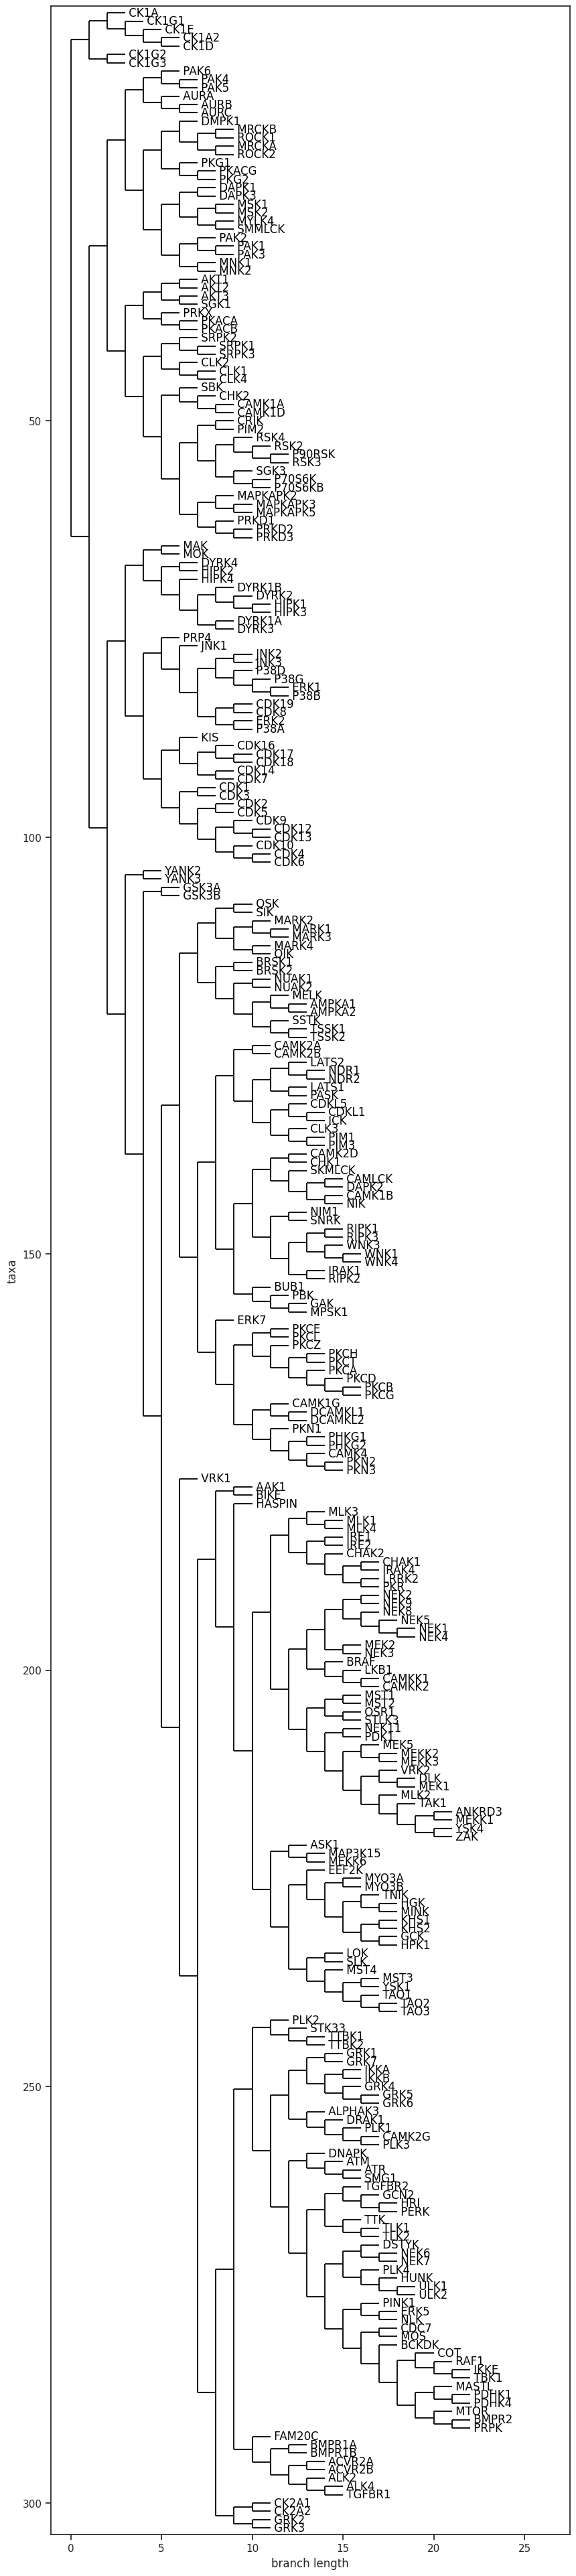

In [129]:
# Plot the tree using Bio.Phylo
tree = Phylo.read(StringIO(newick_str), "newick")

# Create a new figure and a subplot
fig, ax = plt.subplots(figsize=(10, 50), dpi=100)

# Draw the tree
Phylo.draw(tree, axes=ax)

Raw

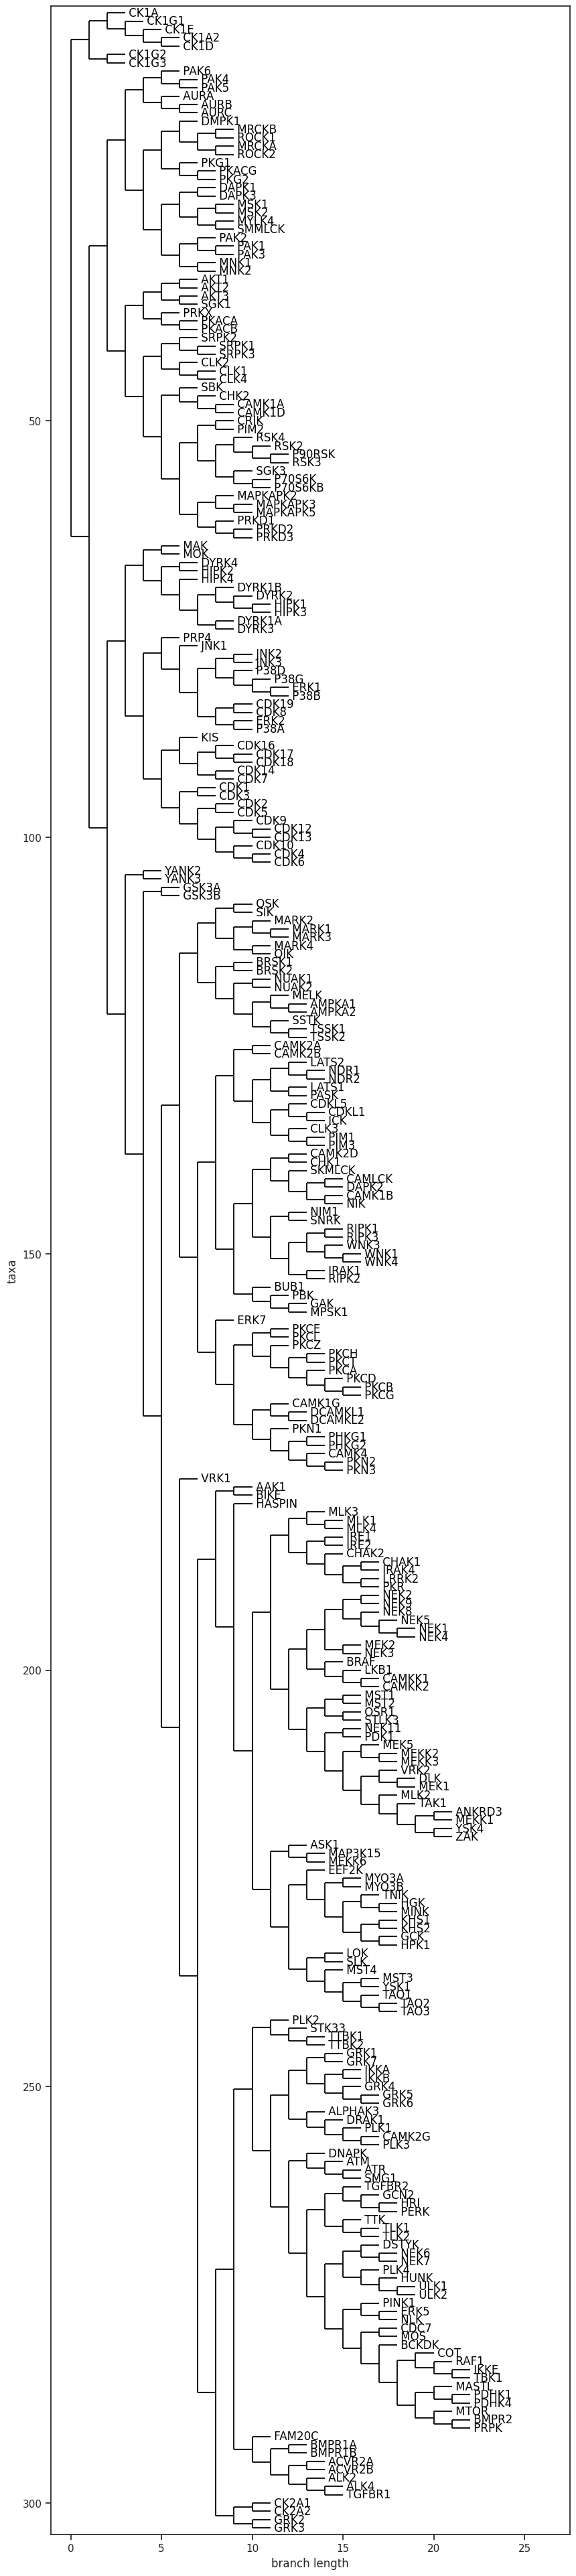

In [130]:
# Plot the tree using Bio.Phylo
tree = Phylo.read(StringIO(newick_str), "newick")

# Create a new figure and a subplot
fig, ax = plt.subplots(figsize=(10, 50), dpi=100)

# Draw the tree
Phylo.draw(tree, axes=ax)

Normalized from paper

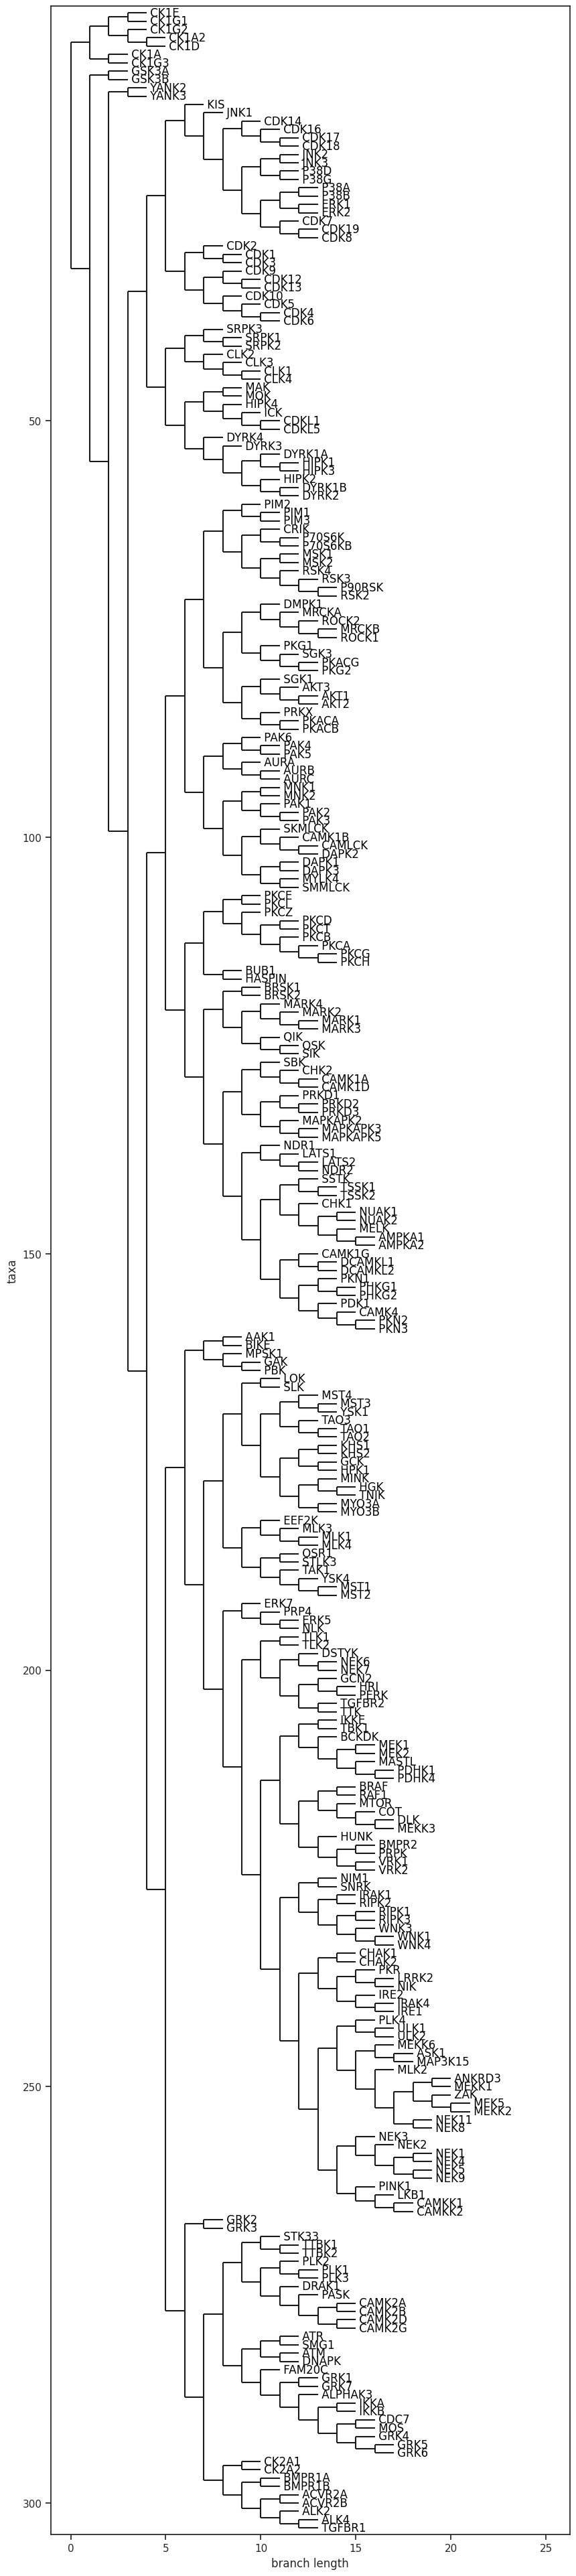

In [18]:
# Plot the tree using Bio.Phylo
tree = Phylo.read(StringIO(newick_str), "newick")

# Create a new figure and a subplot
fig, ax = plt.subplots(figsize=(10, 50), dpi=100)

# Draw the tree
Phylo.draw(tree, axes=ax)

In [ ]:
# Save the Newick string to a file
with open('tree.newick', 'w') as f:
    f.write(newick_str)

Open the tree.newick in figtree

## Cut trees

We can cut the hierarchical clustering dendrogram at a certain distance to form flat clusters.

In [131]:
from scipy.cluster.hierarchy import fcluster

In [132]:
linkage_matrix

array([[131.        , 132.        ,   2.60445139,   2.        ],
       [112.        , 157.        ,   2.72352161,   2.        ],
       [123.        , 280.        ,   2.74596569,   2.        ],
       ...,
       [595.        , 601.        , 109.40499229, 239.        ],
       [596.        , 602.        , 119.63615369, 296.        ],
       [587.        , 603.        , 155.26935504, 303.        ]])

In [133]:
# Assuming `Z` is your linkage matrix, and you want to cut the dendrogram
# at a distance of `t` to form flat clusters. The exact value of `t`
# depends on the distances in your dataset and how many clusters you want.
labels_t1 = fcluster(linkage_matrix, t=25, criterion='distance')
labels_t2 = fcluster(linkage_matrix, t=40, criterion='distance') # more clusters
labels_t3 = fcluster(linkage_matrix, t=60, criterion='distance') # less clusters

In [134]:
info = pd.DataFrame(index=df.index).reset_index()

In [135]:
# Add cluster labels to the original DataFrame
info['Cluster_t1'] = labels_t1
info['Cluster_t2'] = labels_t2
info['Cluster_t3'] = labels_t3

In [136]:
info.Cluster_t1.unique().shape,info.Cluster_t2.unique().shape,info.Cluster_t3.unique().shape

((27,), (12,), (7,))

## Visualize

In [137]:
category = Data.get_kinase_info()[['kinase','Family','category','category_big']]

In [138]:
category

kinase Family   category category_big
0      AAK1  Other        NAK          NAK
1      ALK2    TKL      TGFBR  acidophilic
2      ALK4    TKL      TGFBR  acidophilic
3    ACVR2A    TKL      TGFBR  acidophilic
4    ACVR2B    TKL      TGFBR  acidophilic
..      ...    ...        ...          ...
298    VRK1    CK1  ALPHA/MLK    ALPHA/MLK
299    VRK2    CK1   assorted     assorted
300    WNK1  Other   RIPK/WNK     RIPK/WNK
301    WNK3  Other   RIPK/WNK     RIPK/WNK
302    WNK4  Other   RIPK/WNK     RIPK/WNK

[303 rows x 4 columns]

In [139]:
kinase_info = info.merge(category,'left')

In [140]:
df2 = df.reset_index()

In [141]:
(kinase_info.kinase == df2.kinase).value_counts()

True    303
Name: kinase, dtype: int64

### scaled raw

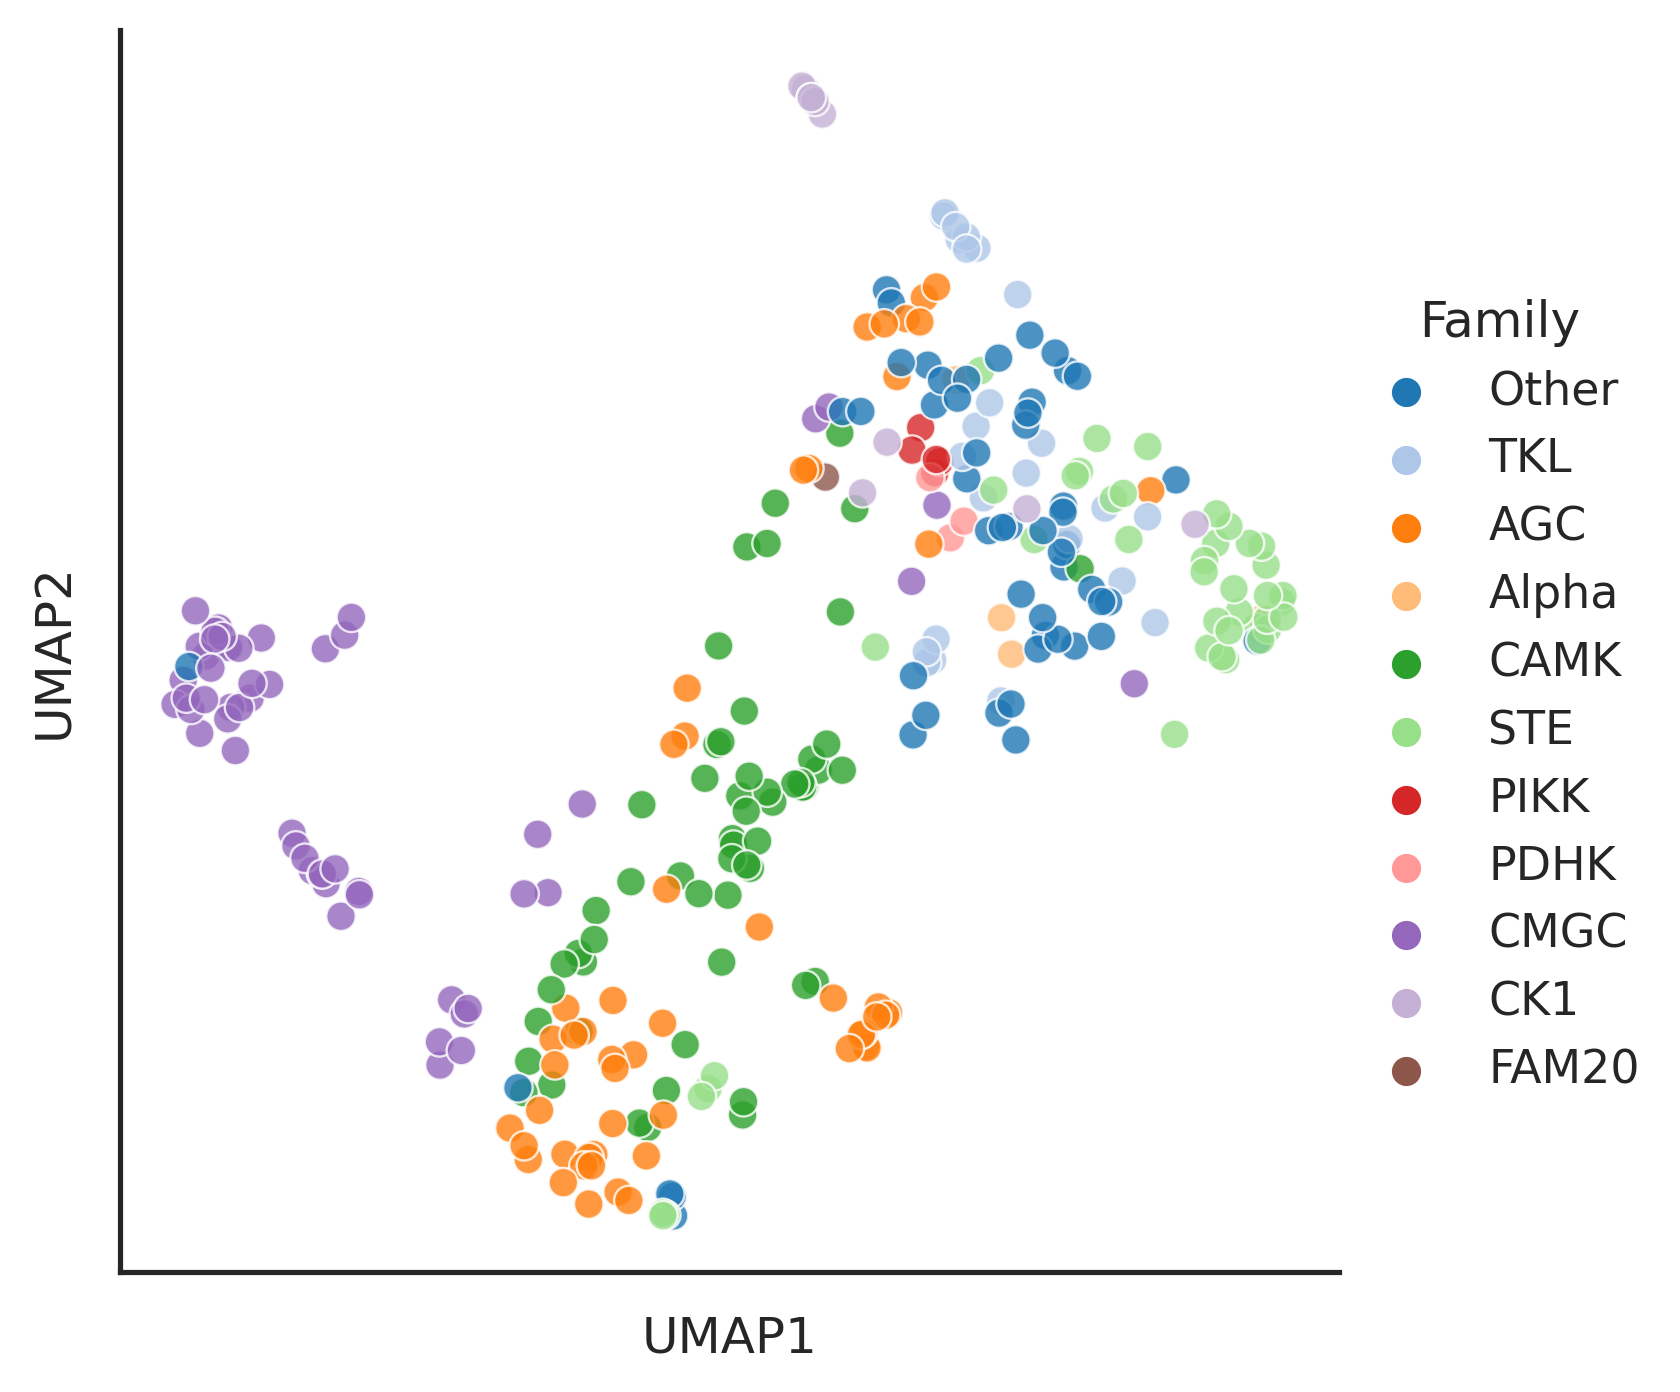

In [142]:
plot_cluster(df2, hue = kinase_info.Family, legend=True,method= 'umap')

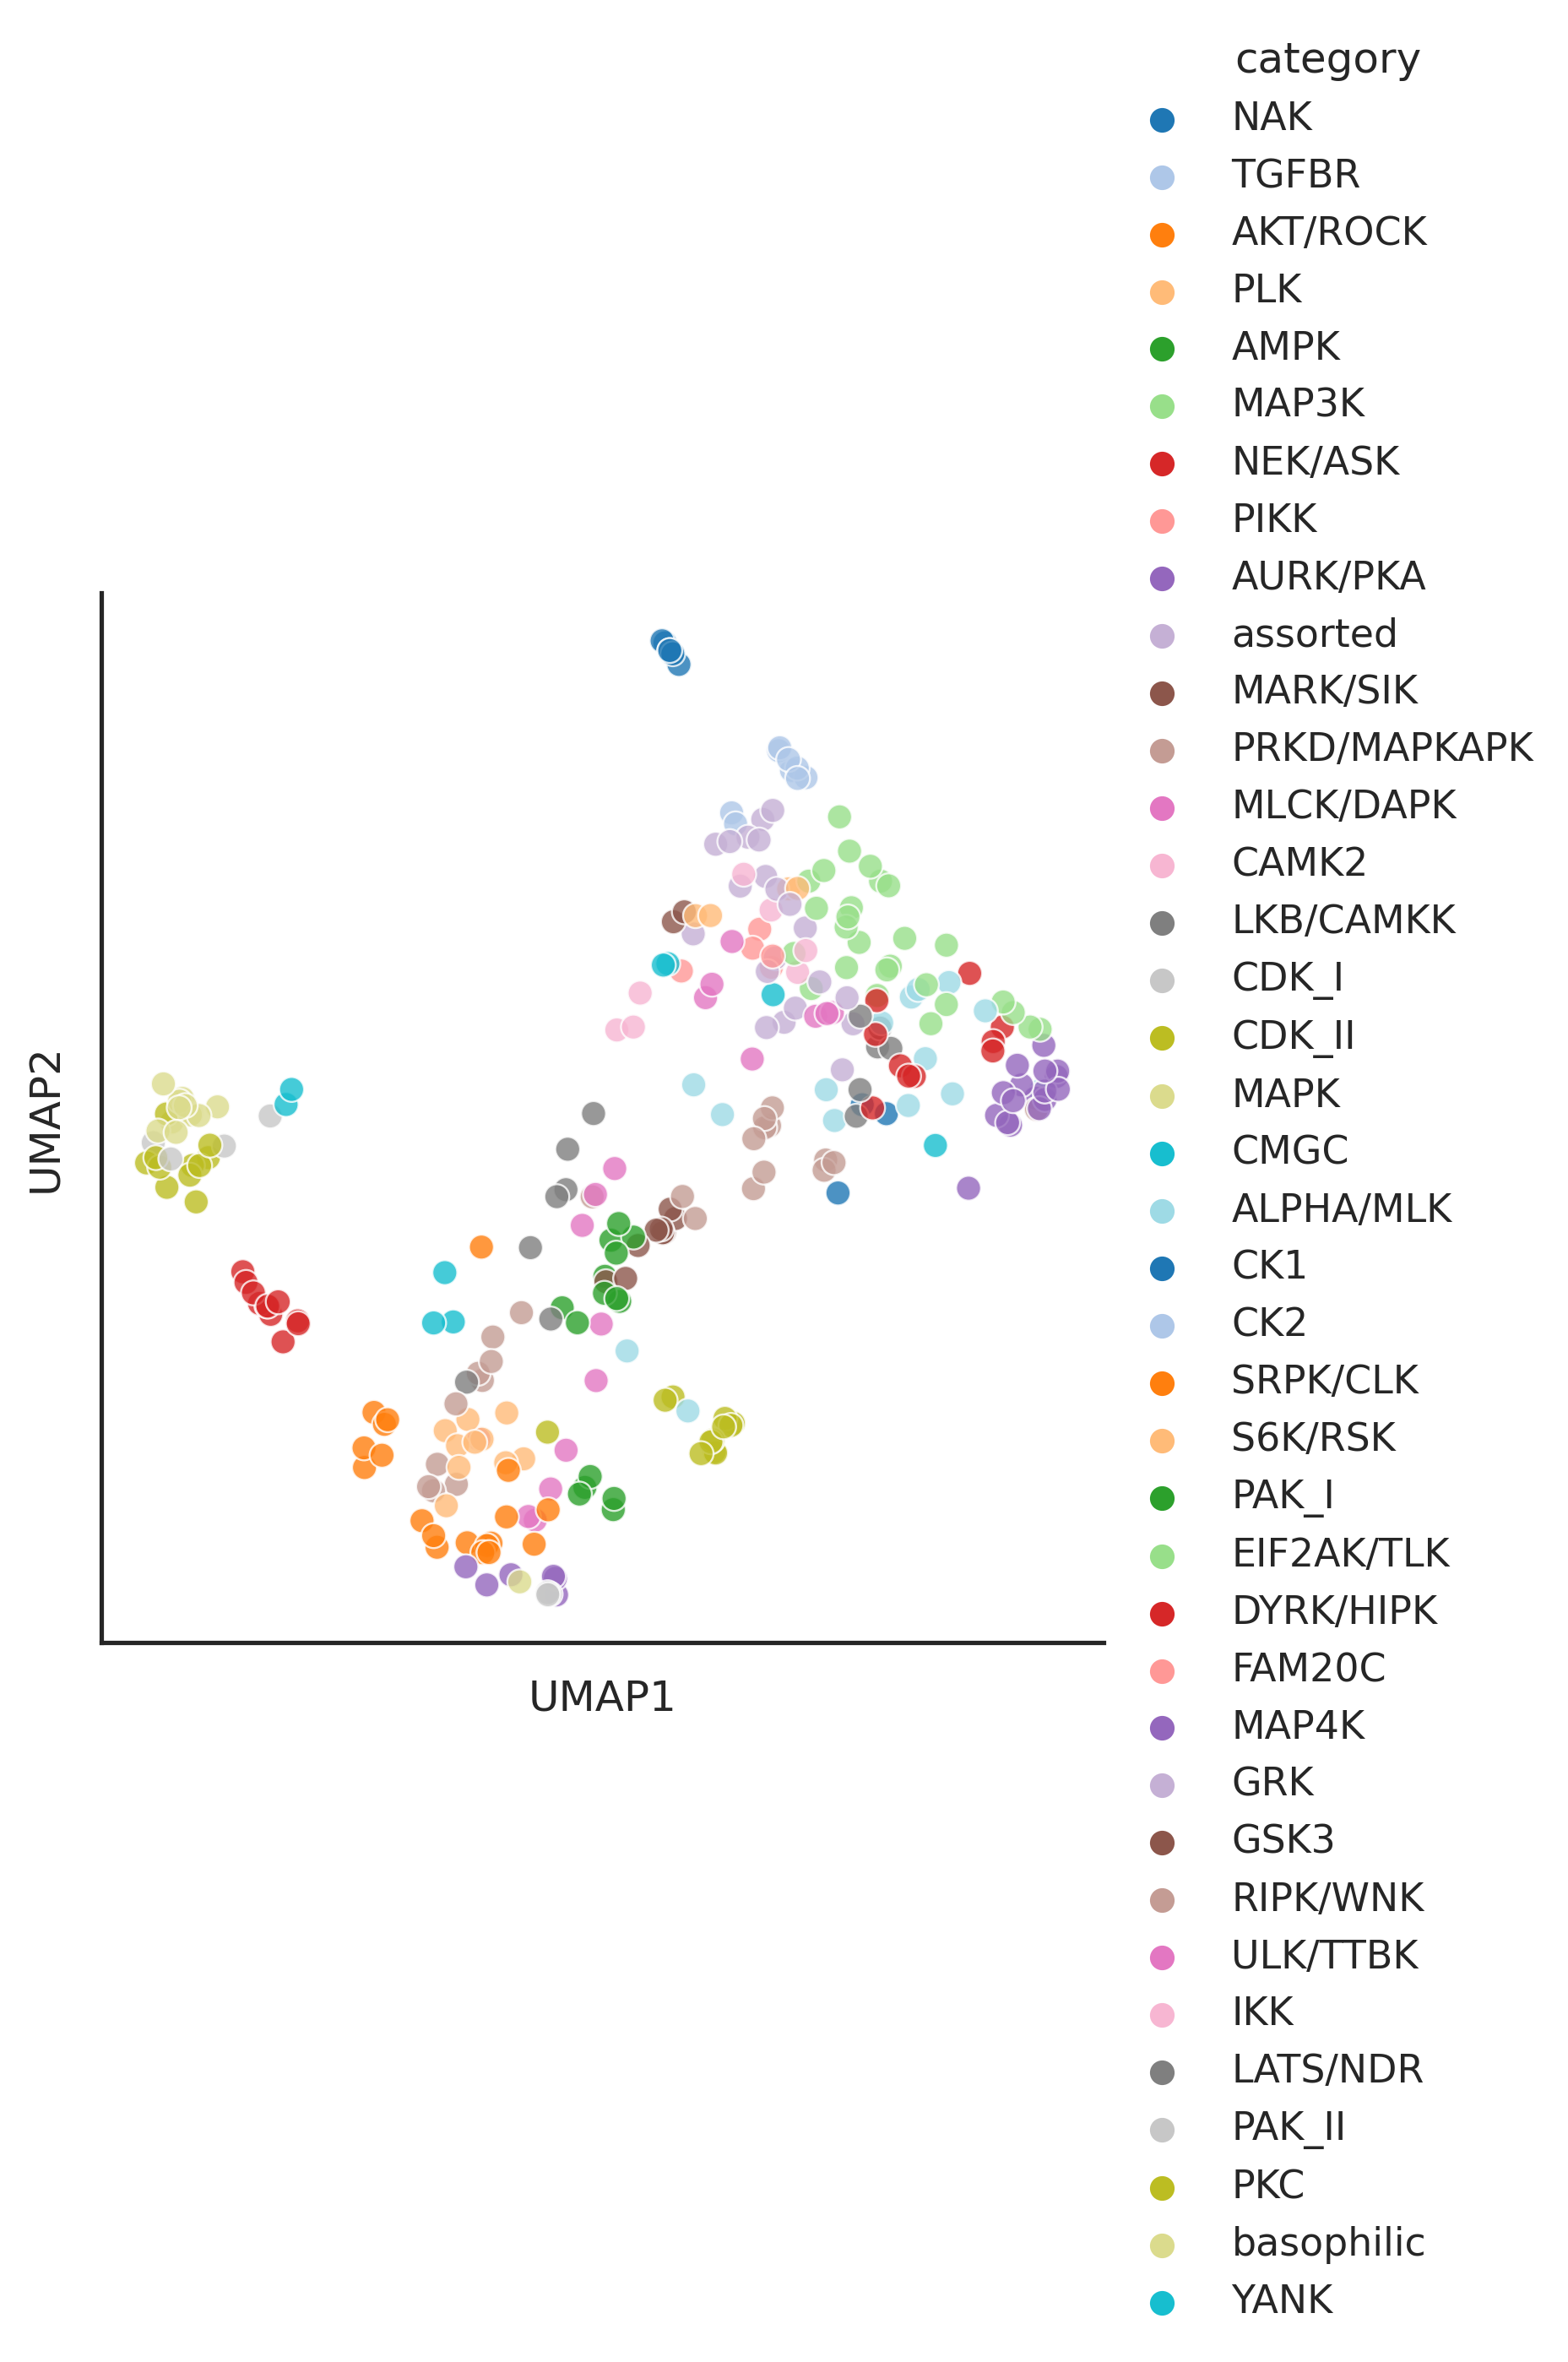

In [143]:
plot_cluster(df2, hue = kinase_info.category, legend=True,method= 'umap')

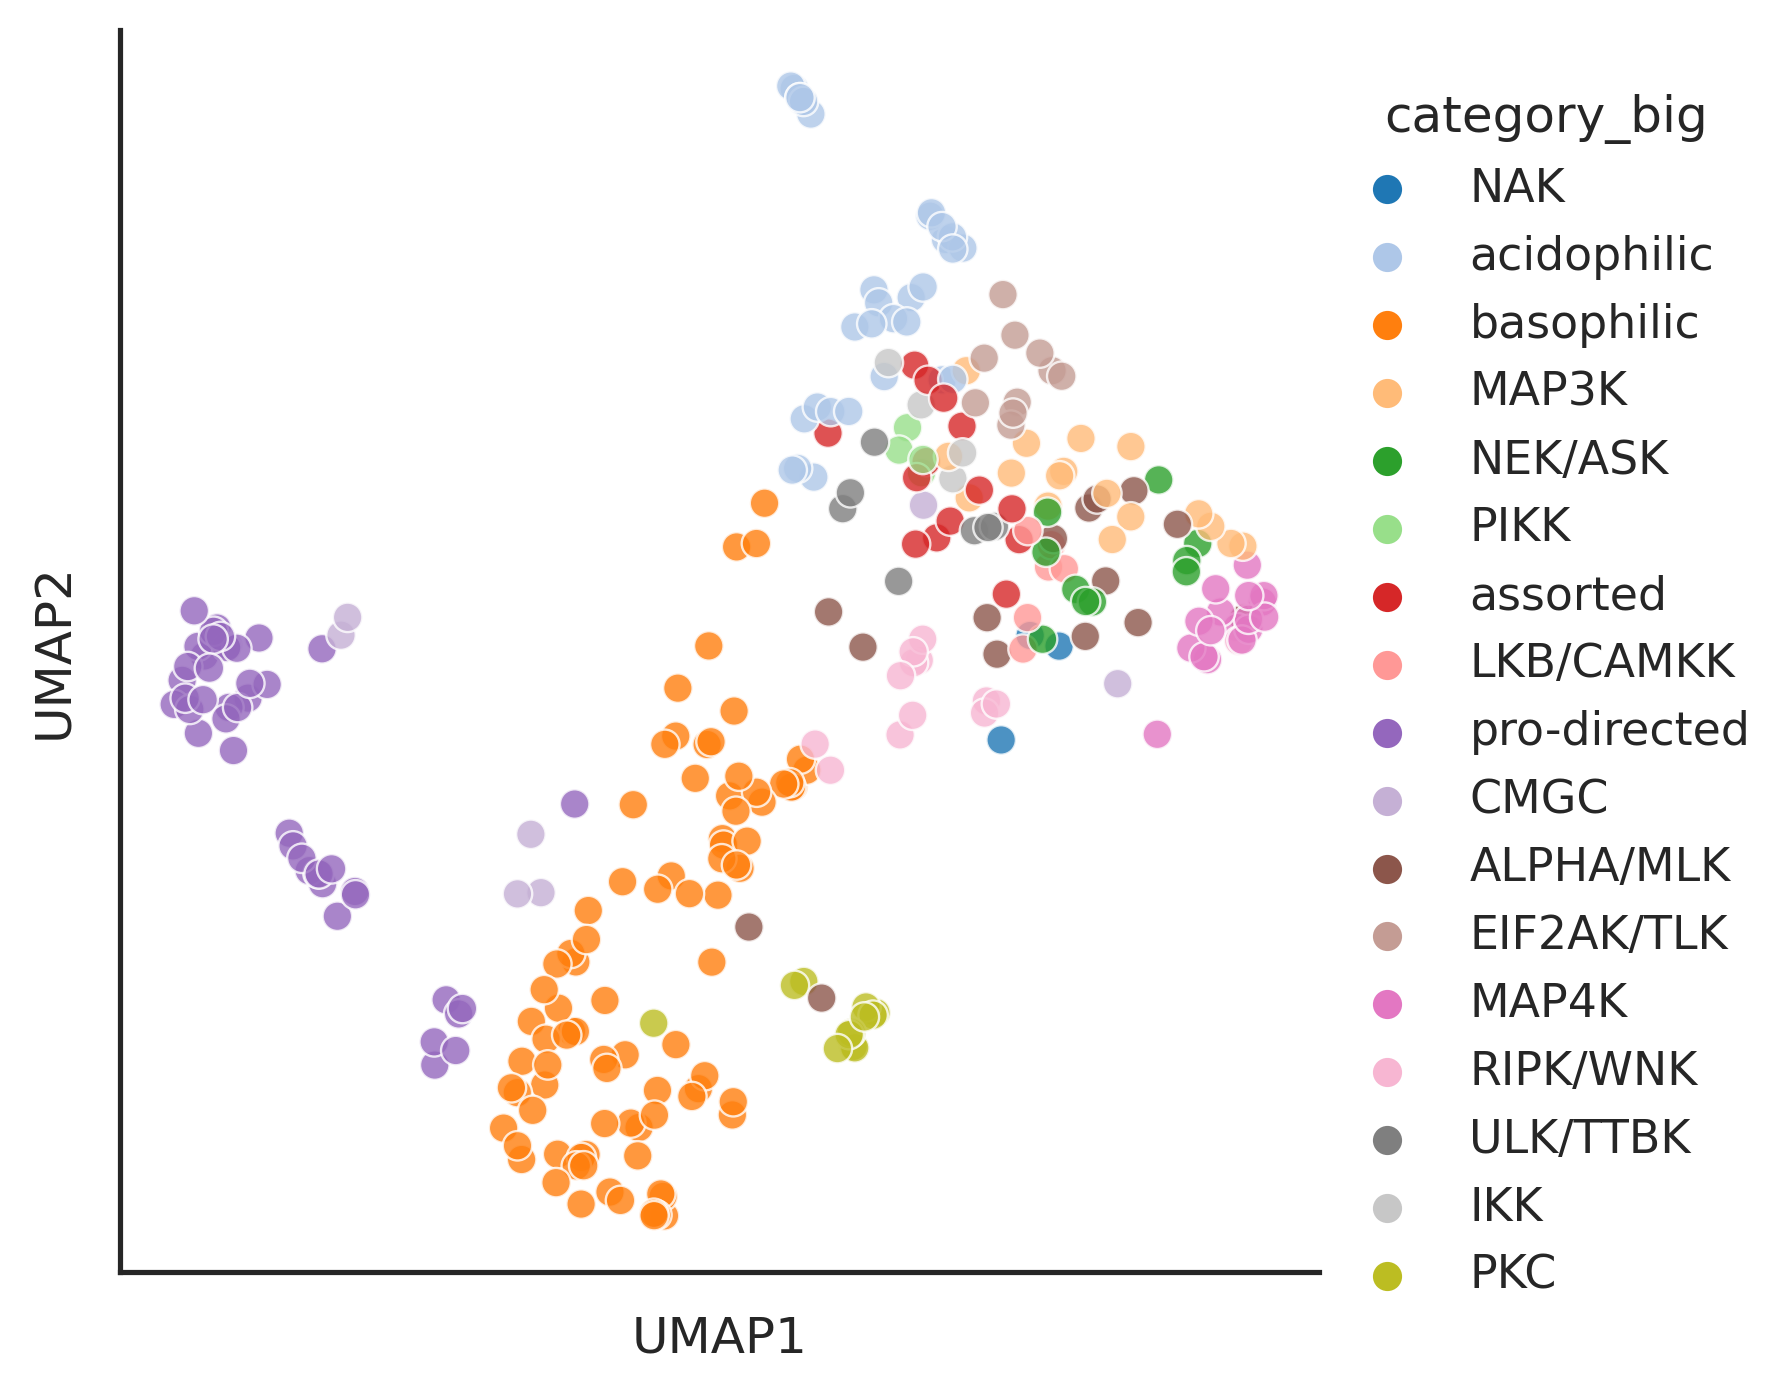

In [144]:
plot_cluster(df2, hue = kinase_info.category_big, legend=True,method= 'umap')

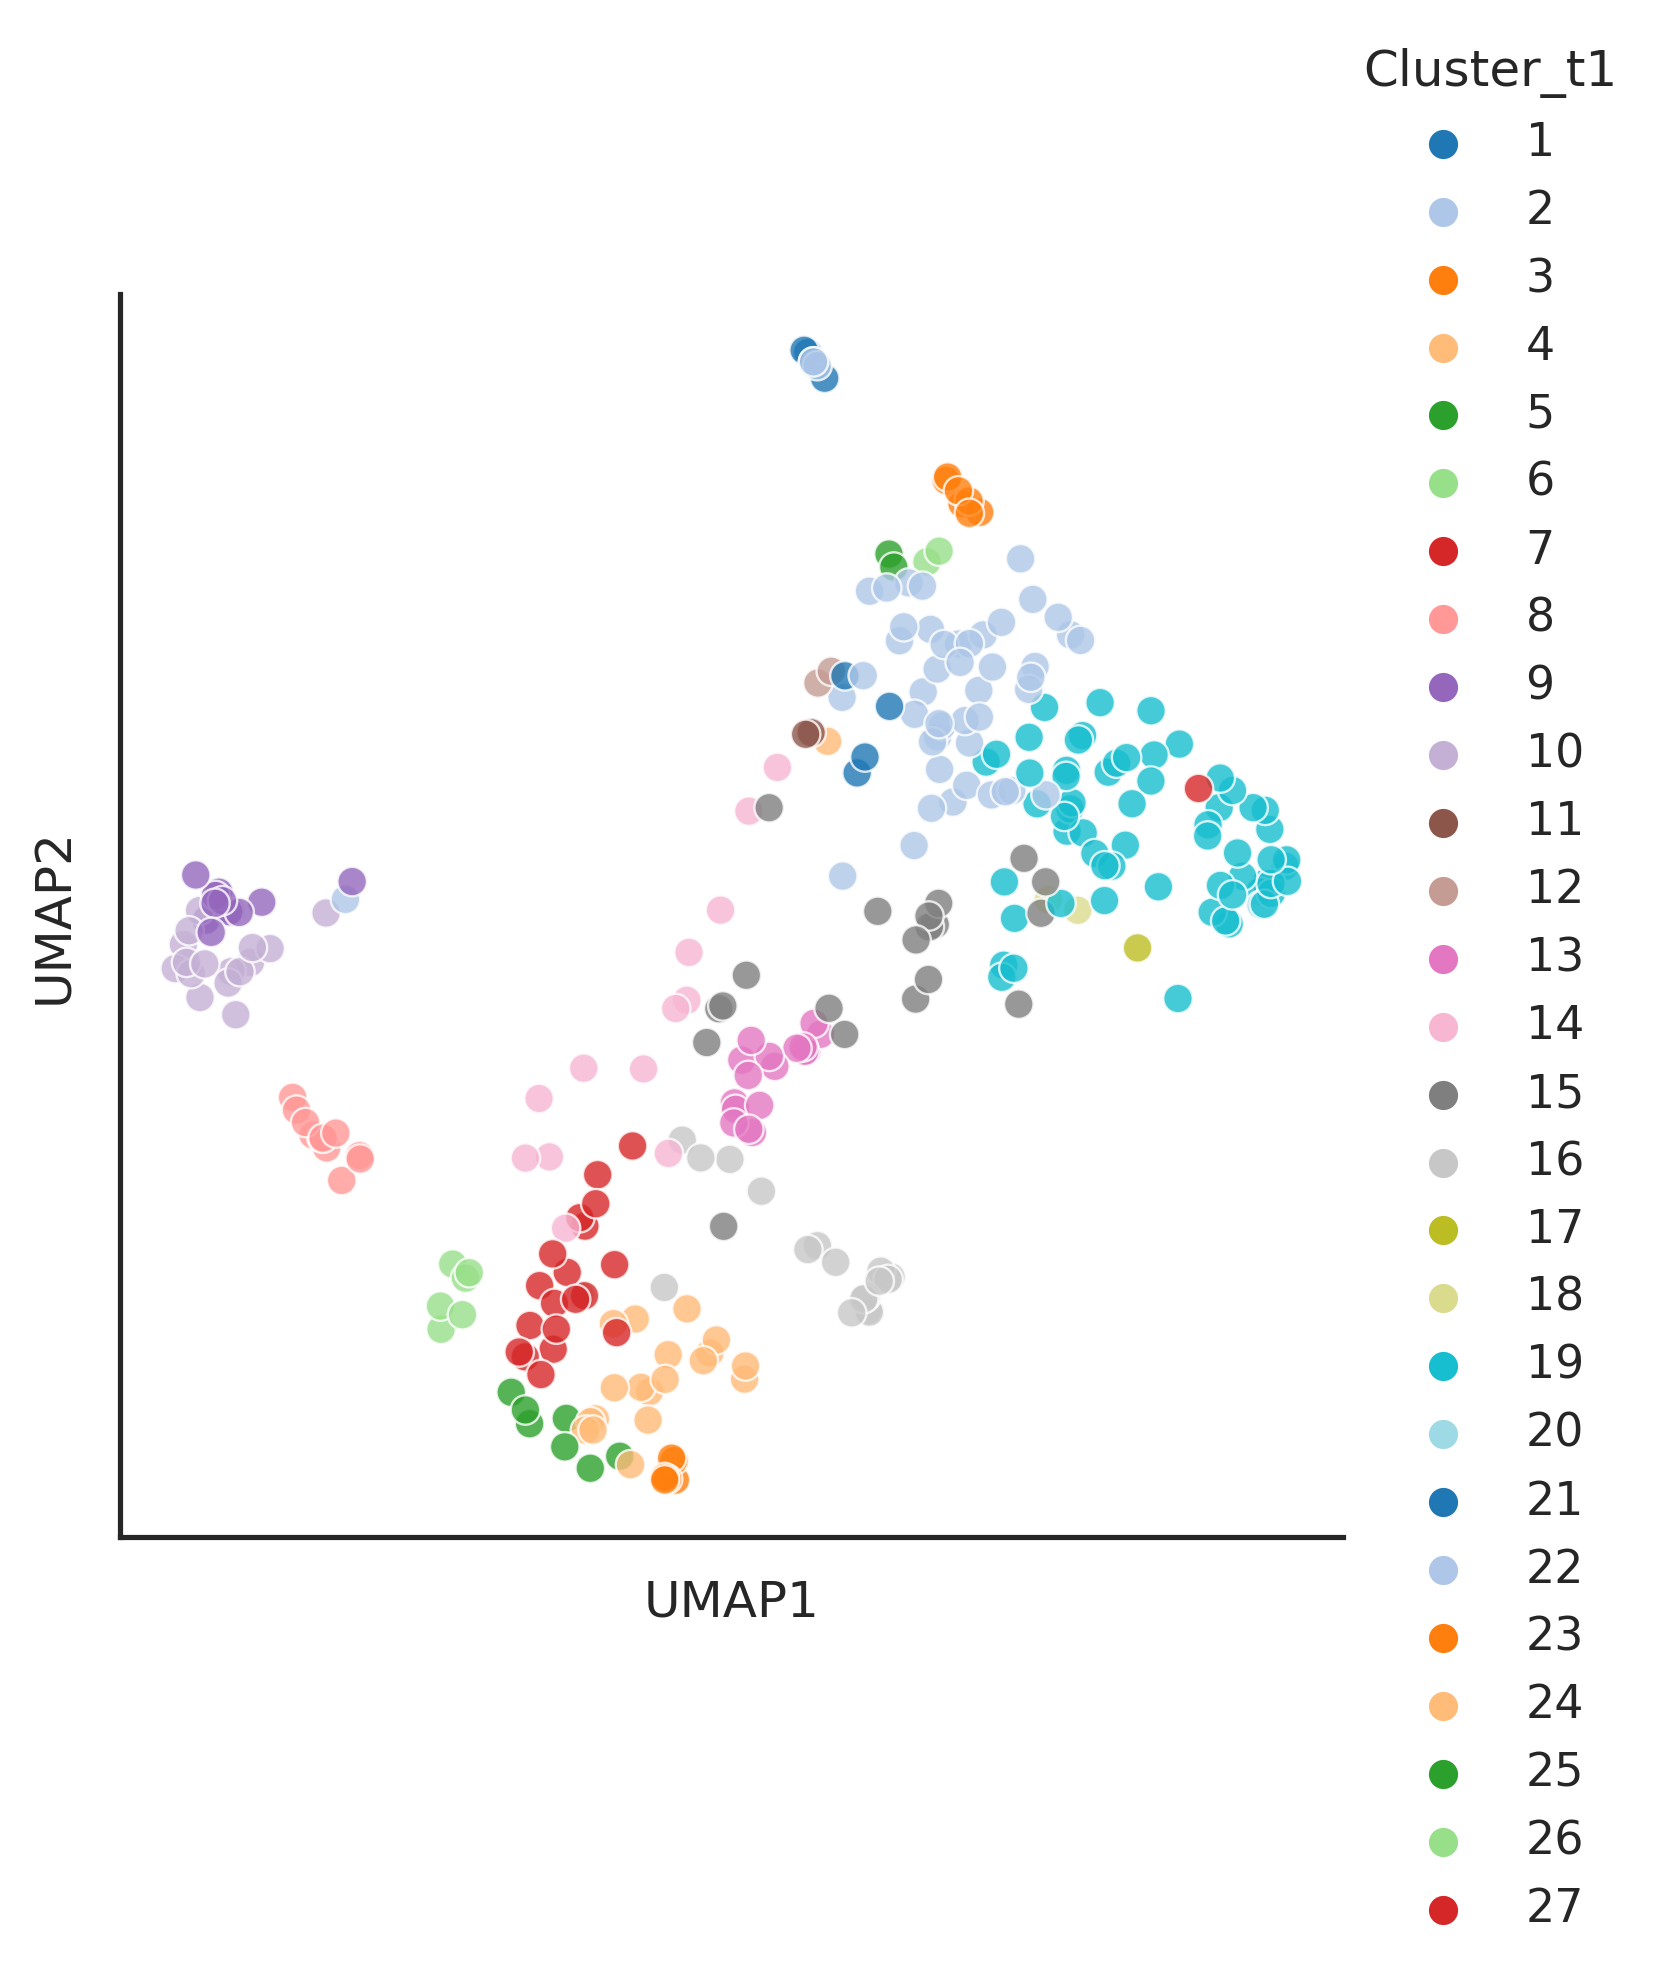

In [145]:
plot_cluster(df2, hue = info.Cluster_t1, legend=True,method= 'umap')

In [34]:
info.Cluster_t2.value_counts()

8     69
9     64
10    58
3     32
5     28
2     25
4     11
1      7
11     4
7      2
6      2
12     1
Name: Cluster_t2, dtype: int64

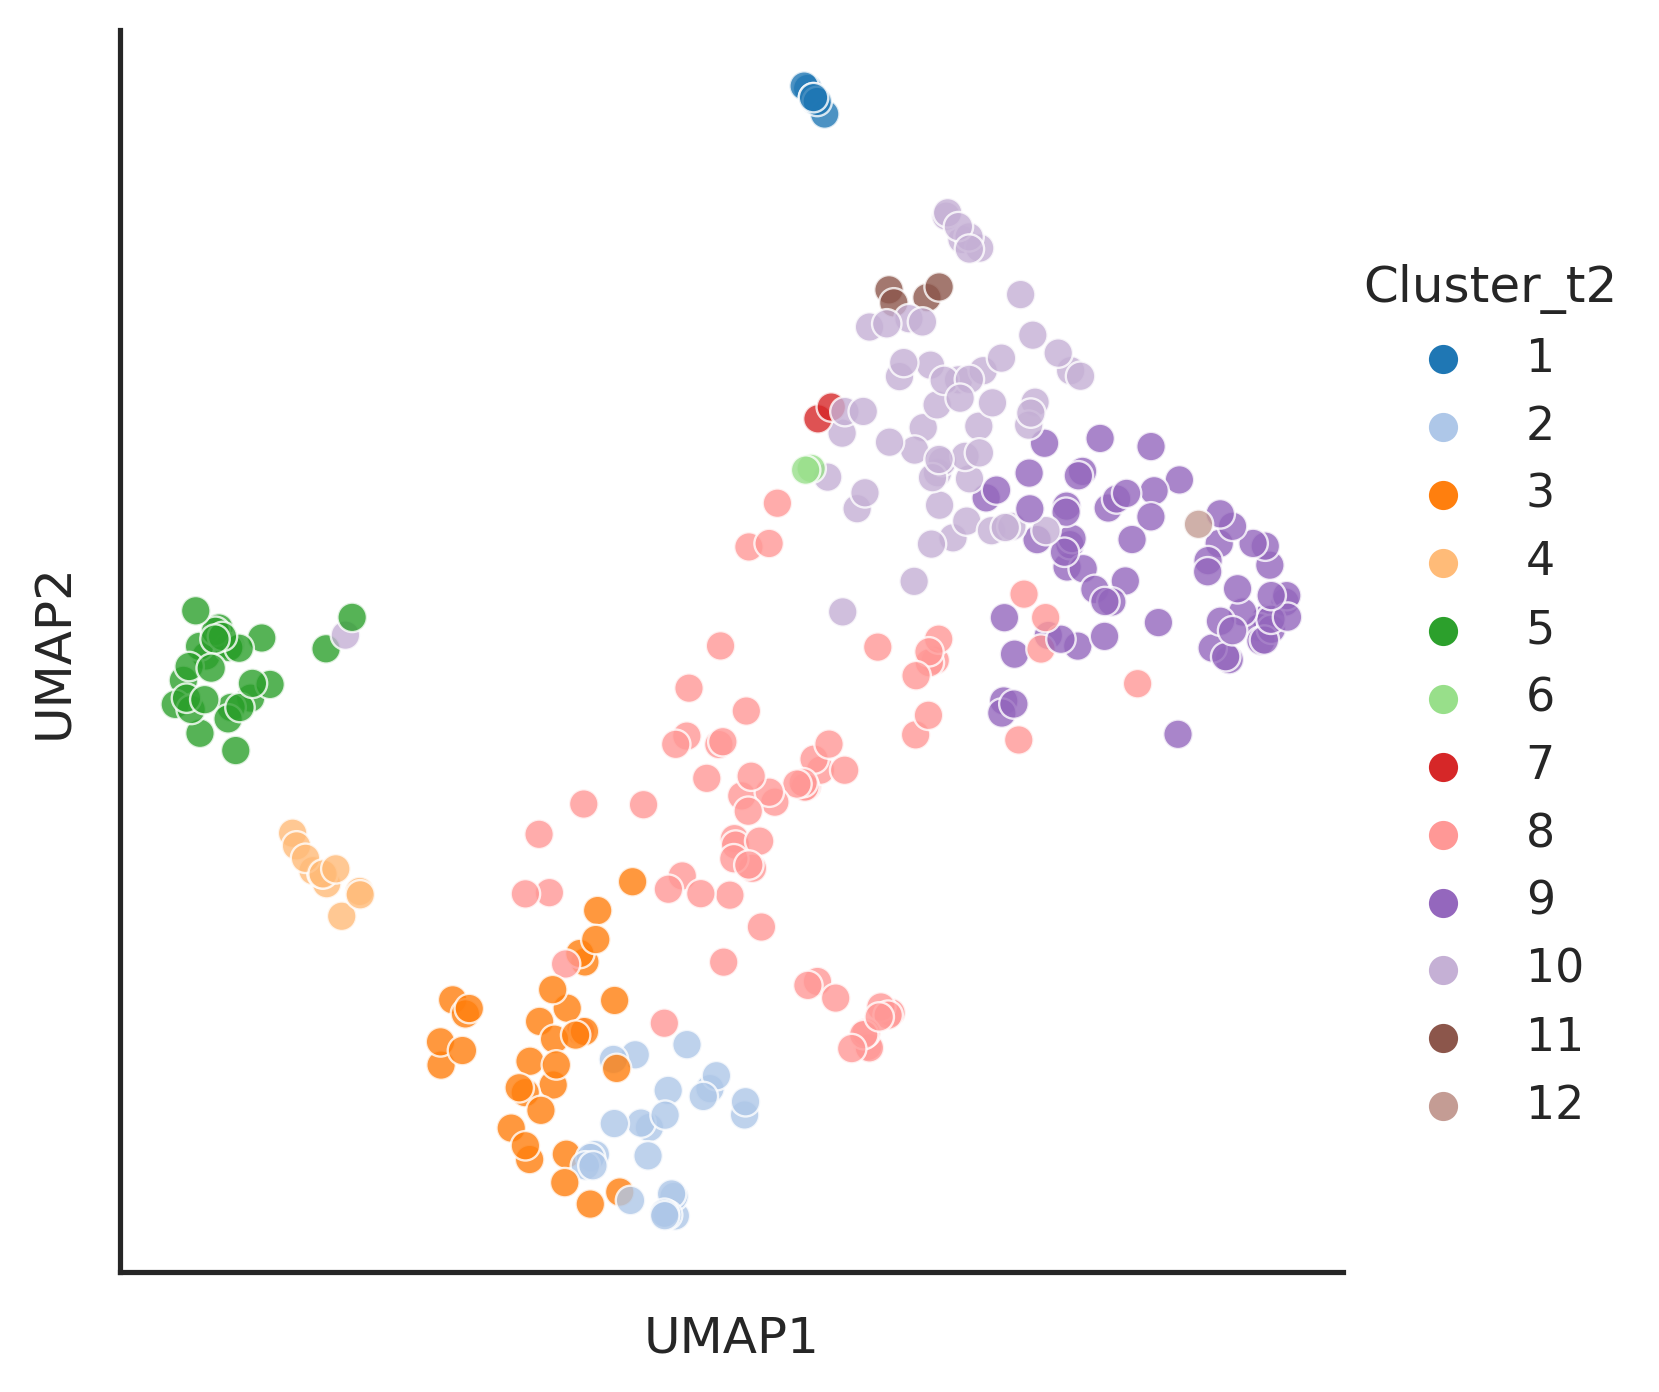

In [32]:
plot_cluster(df, hue = info.Cluster_t2, legend=True,method= 'umap',complexity=30)

In [ ]:
info.loc[info['Cluster_t2'] == 7, 'Cluster_t2'] = 10

info.loc[info['Cluster_t2'] == 6, 'Cluster_t2'] = 10

info.loc[info['Cluster_t2'] == 12, 'Cluster_t2'] = 9

info.loc[info['Cluster_t2'] == 11, 'Cluster_t2'] = 10

In [51]:
info.Cluster_t2.value_counts()

8     69
10    66
9     65
3     32
5     28
2     25
4     11
1      7
Name: Cluster_t2, dtype: int64

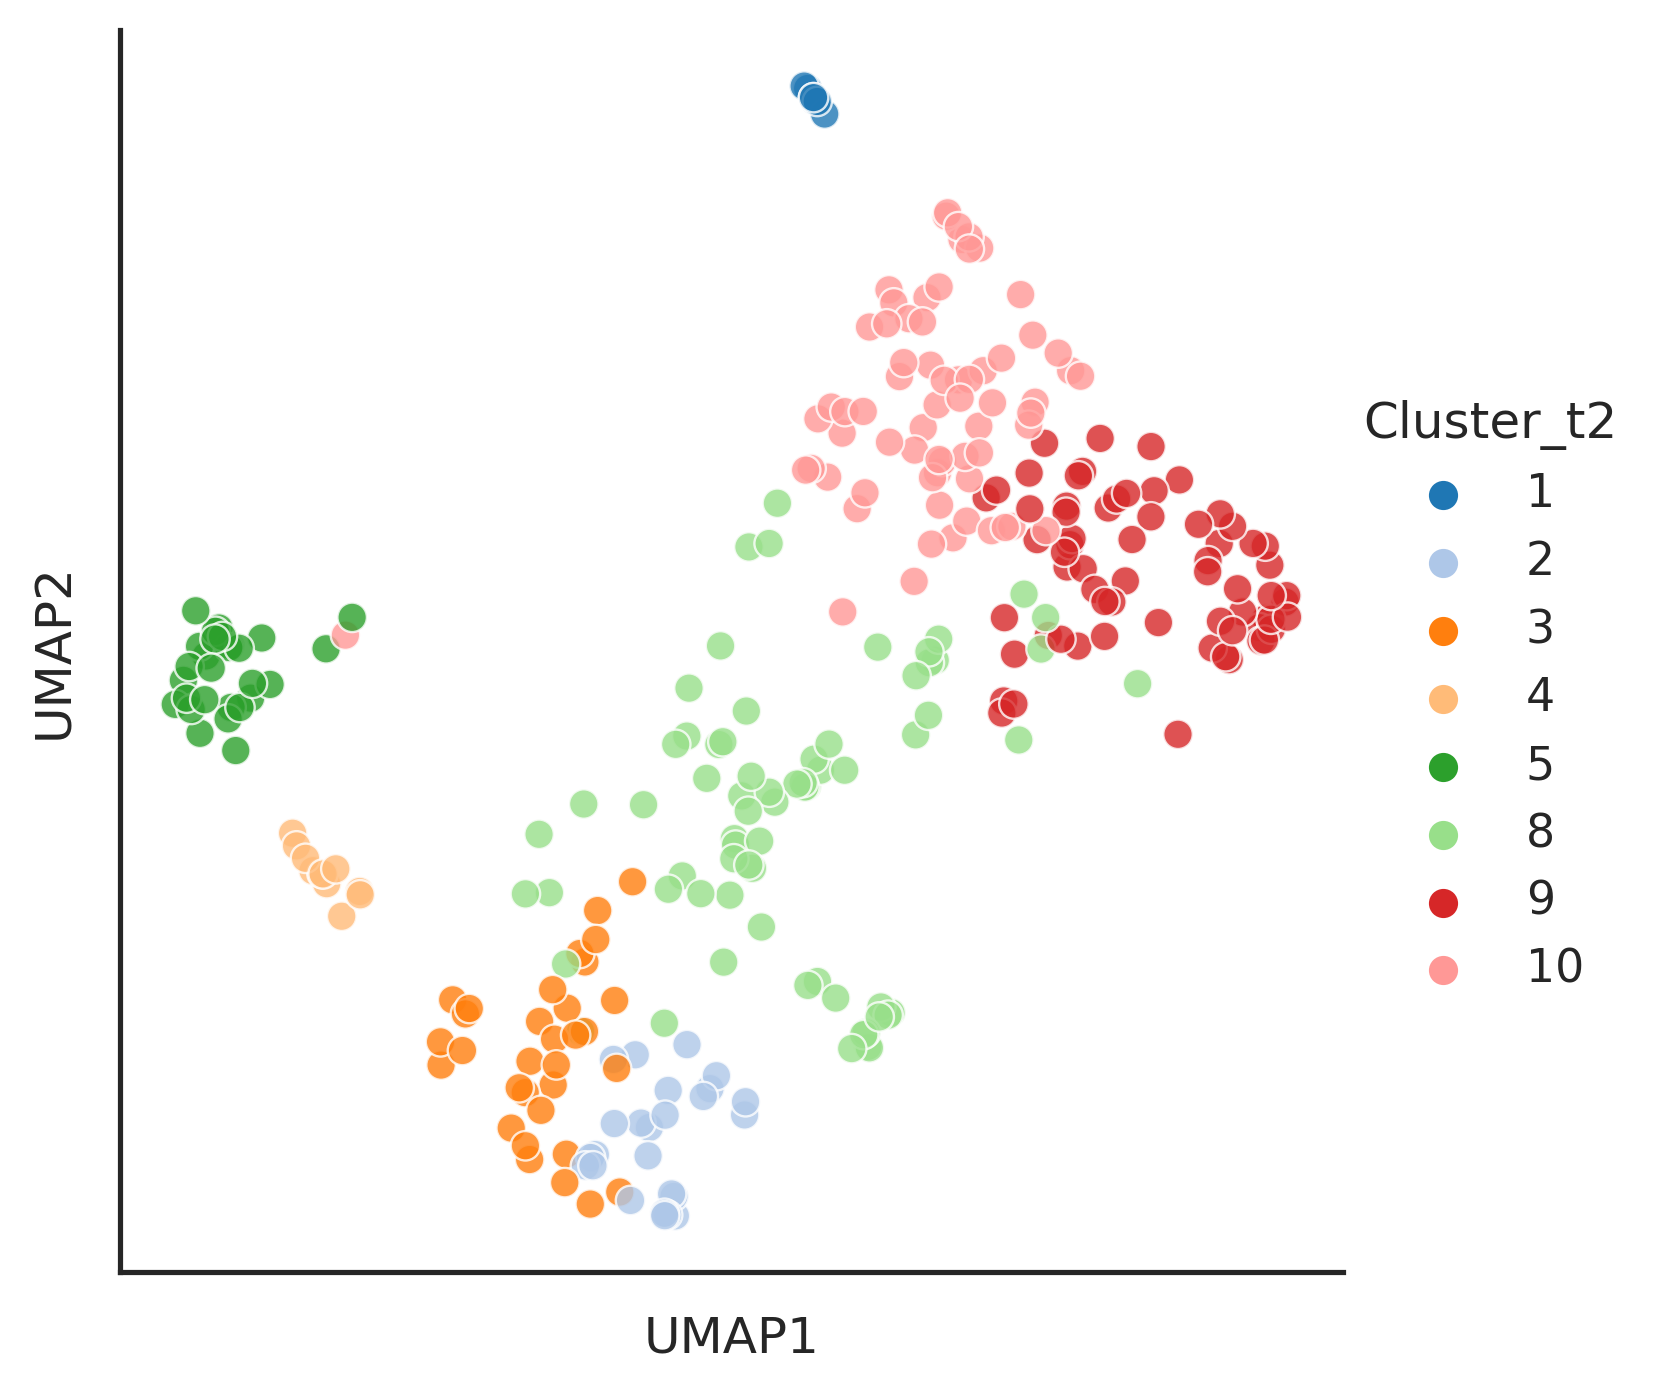

In [52]:
plot_cluster(df, hue = info.Cluster_t2, legend=True,method= 'umap',complexity=30)

In [75]:
# kinase_info = Data.get_kinase_info()

# info = info.rename(columns = {'Cluster_t2':'cluster'})

# info = info[['kinase','cluster']]

# kinase_info2 = kinase_info.merge(info,'left')

# kinase_info2.to_csv('STkinase_info2.csv',index= False)

### Normalized from paper

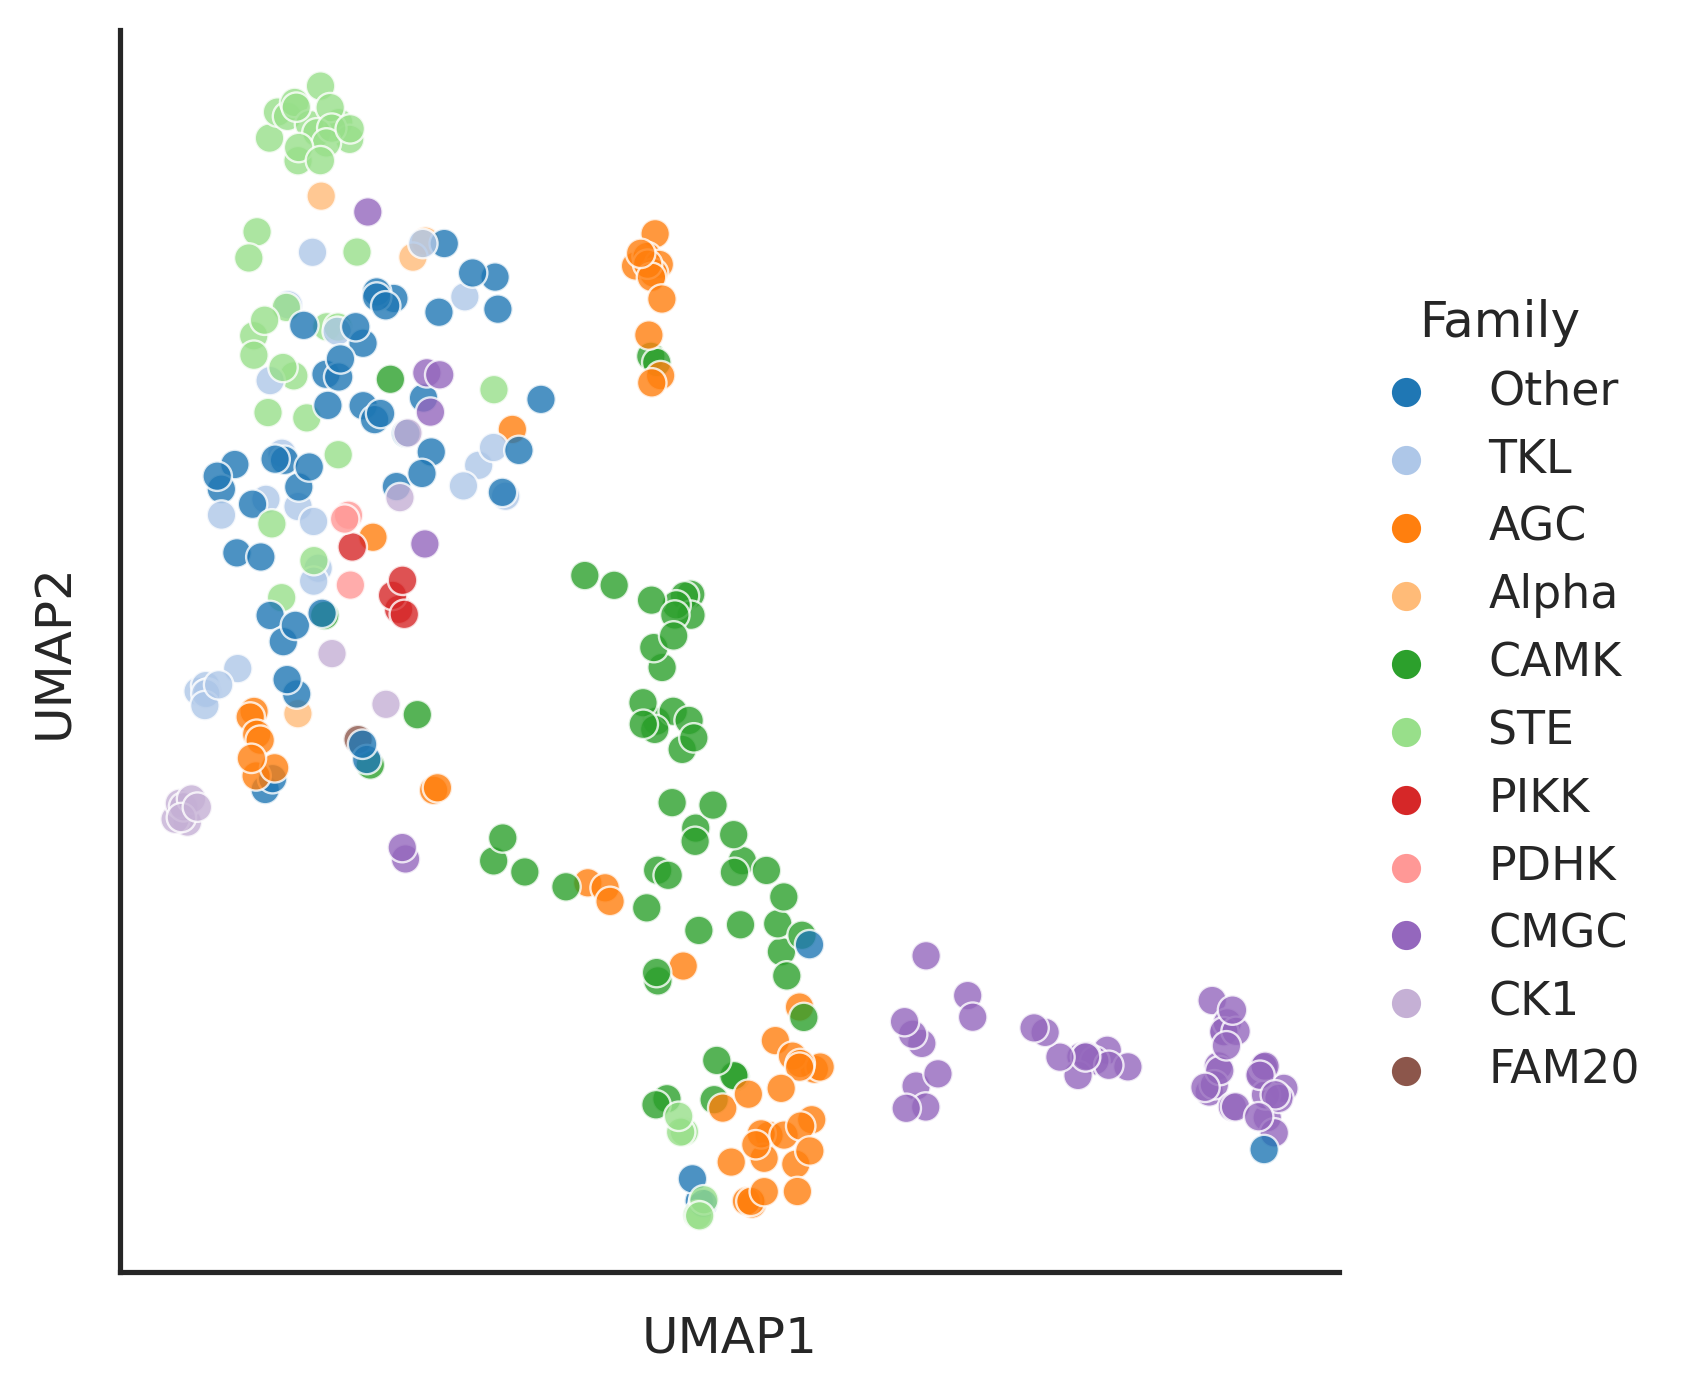

In [ ]:
plot_cluster(df, hue = kinase_info.Family, legend=True,method= 'umap')

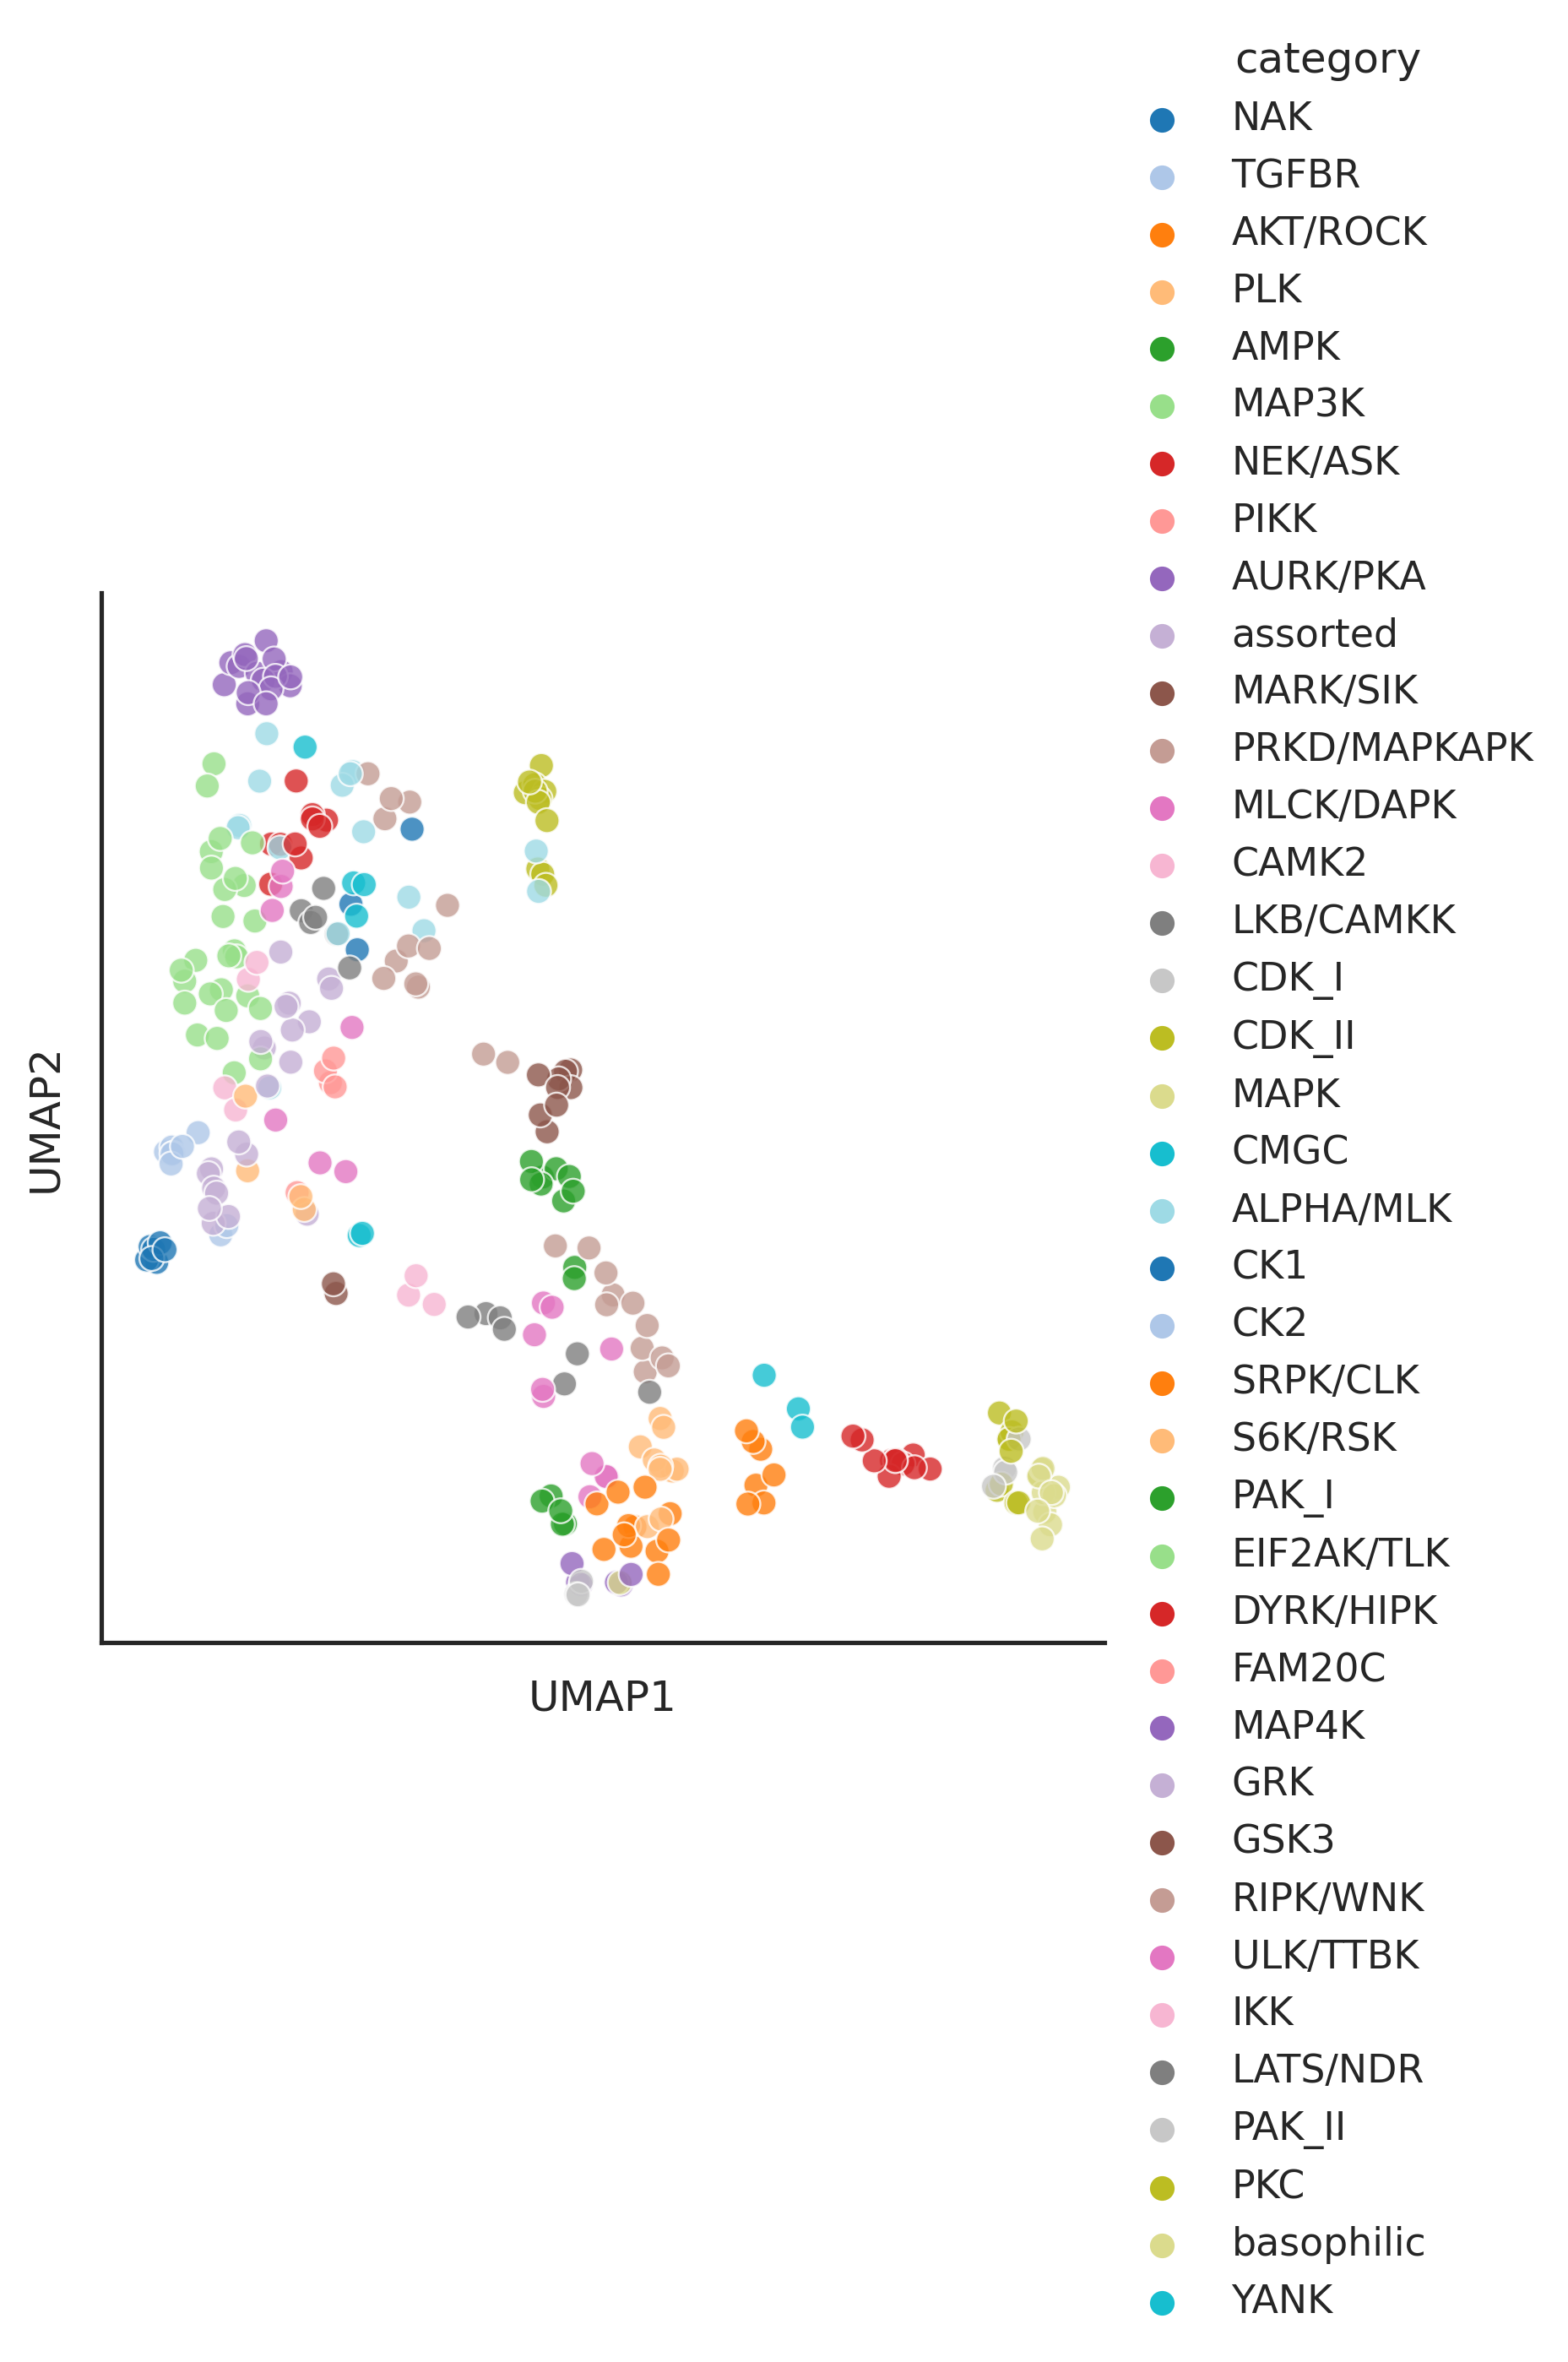

In [ ]:
plot_cluster(df, hue = kinase_info.category, legend=True,method= 'umap')

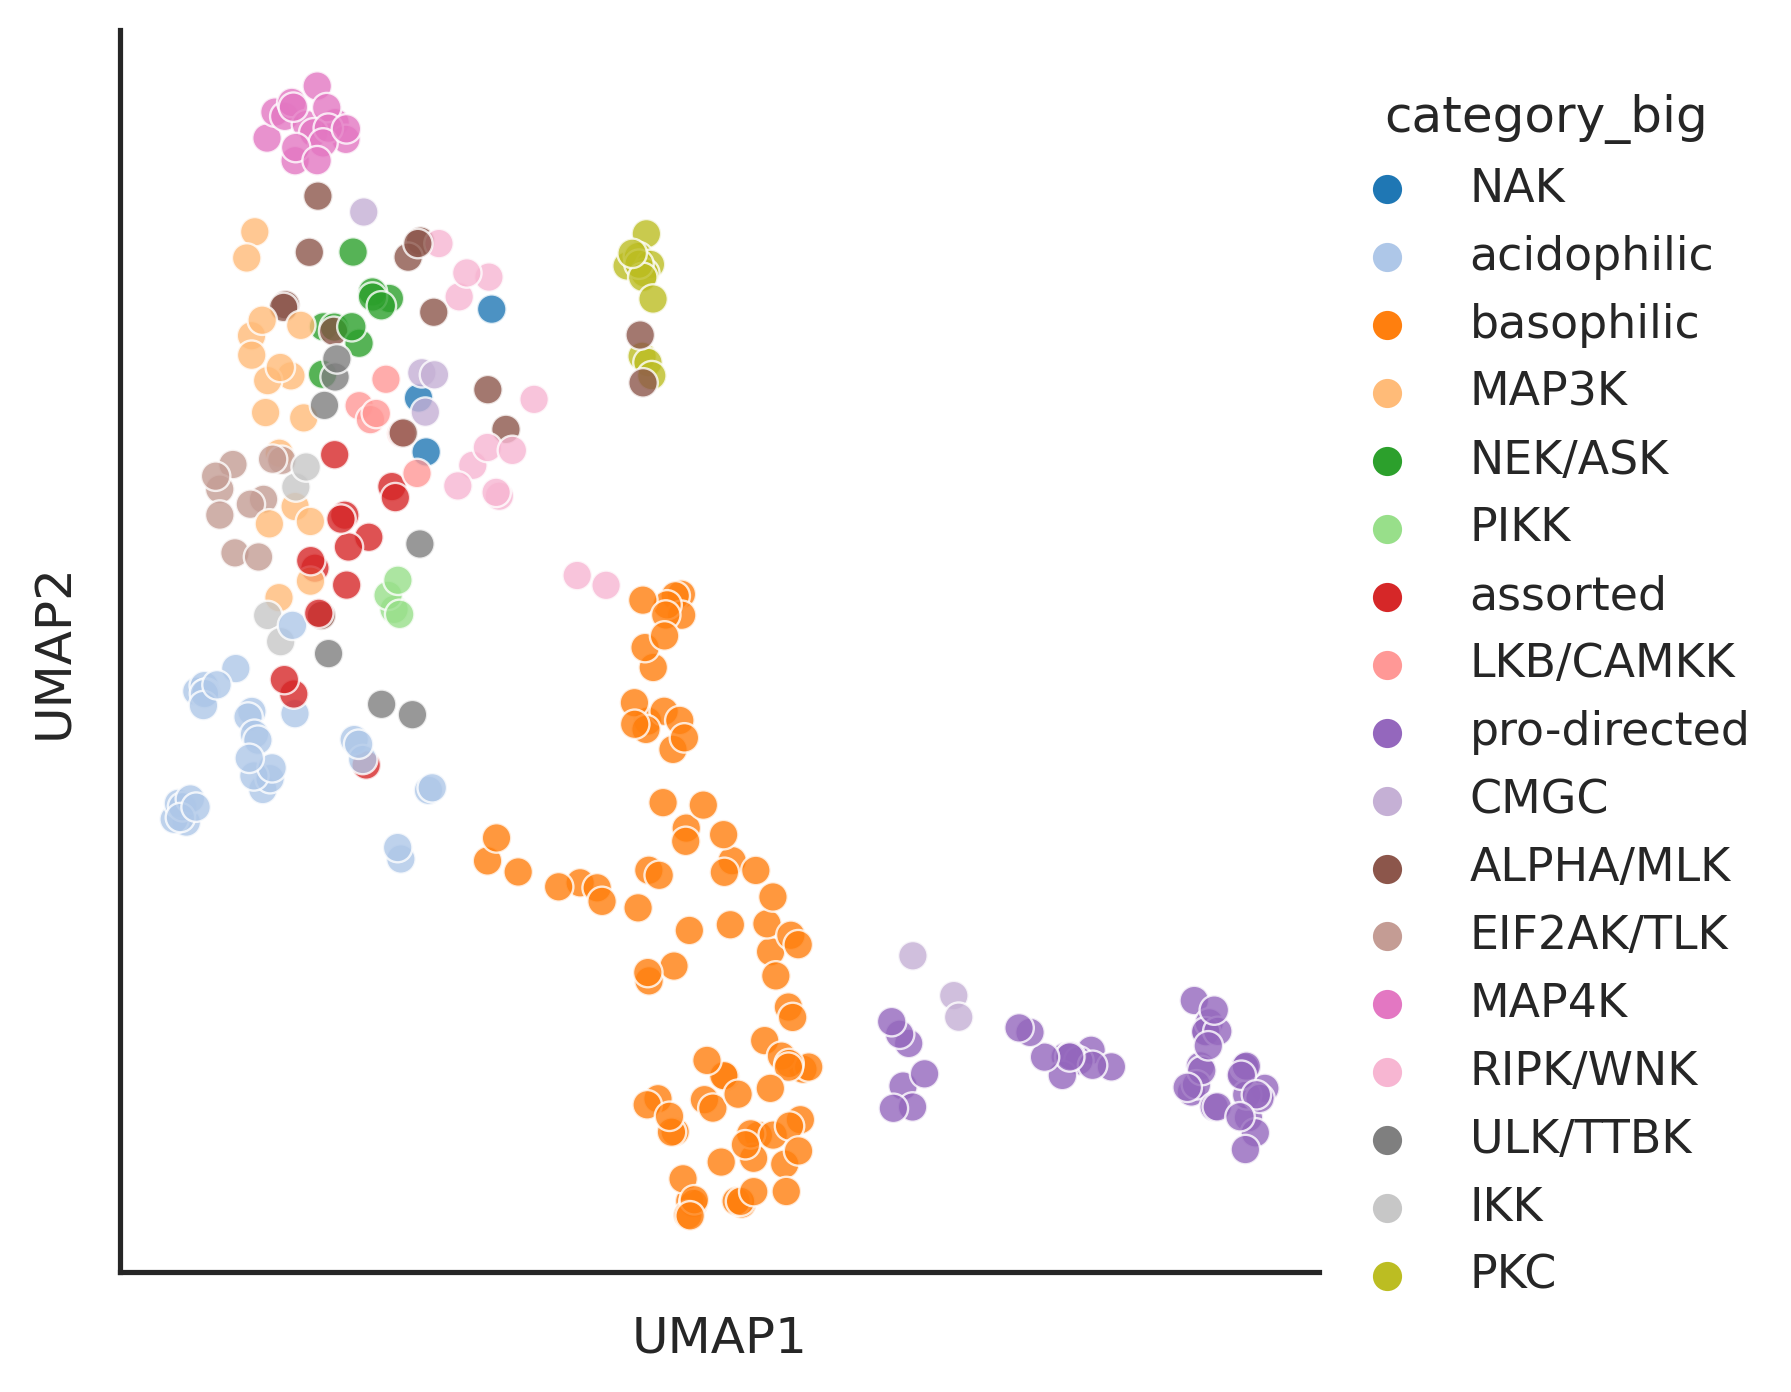

In [ ]:
plot_cluster(df, hue = kinase_info.category_big, legend=True,method= 'umap')

### t = 0.5

In [ ]:
info.Cluster_t05.sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48,
       49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84], dtype=int32)

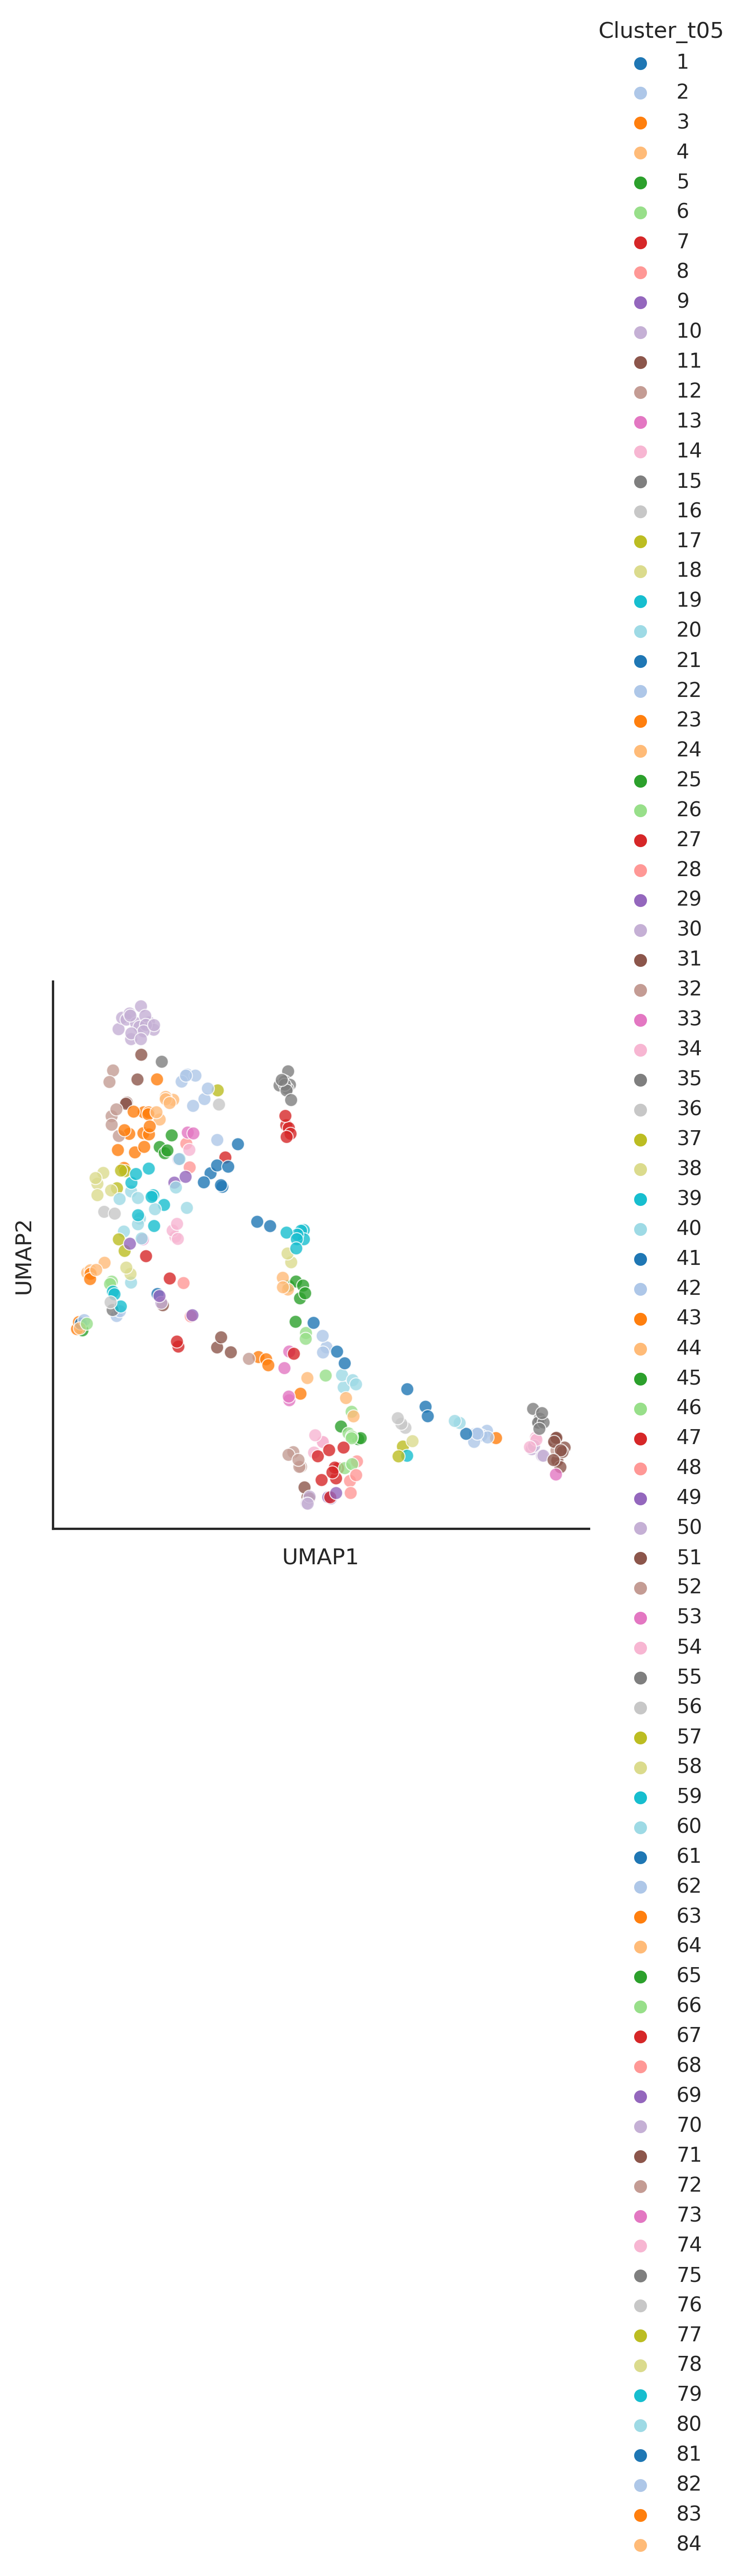

In [ ]:
plot_cluster(df, hue = info.Cluster_t05, legend=True,method= 'umap',complexity=30)

### t=1

30 clusters

In [ ]:
info.Cluster_t1.sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], dtype=int32)

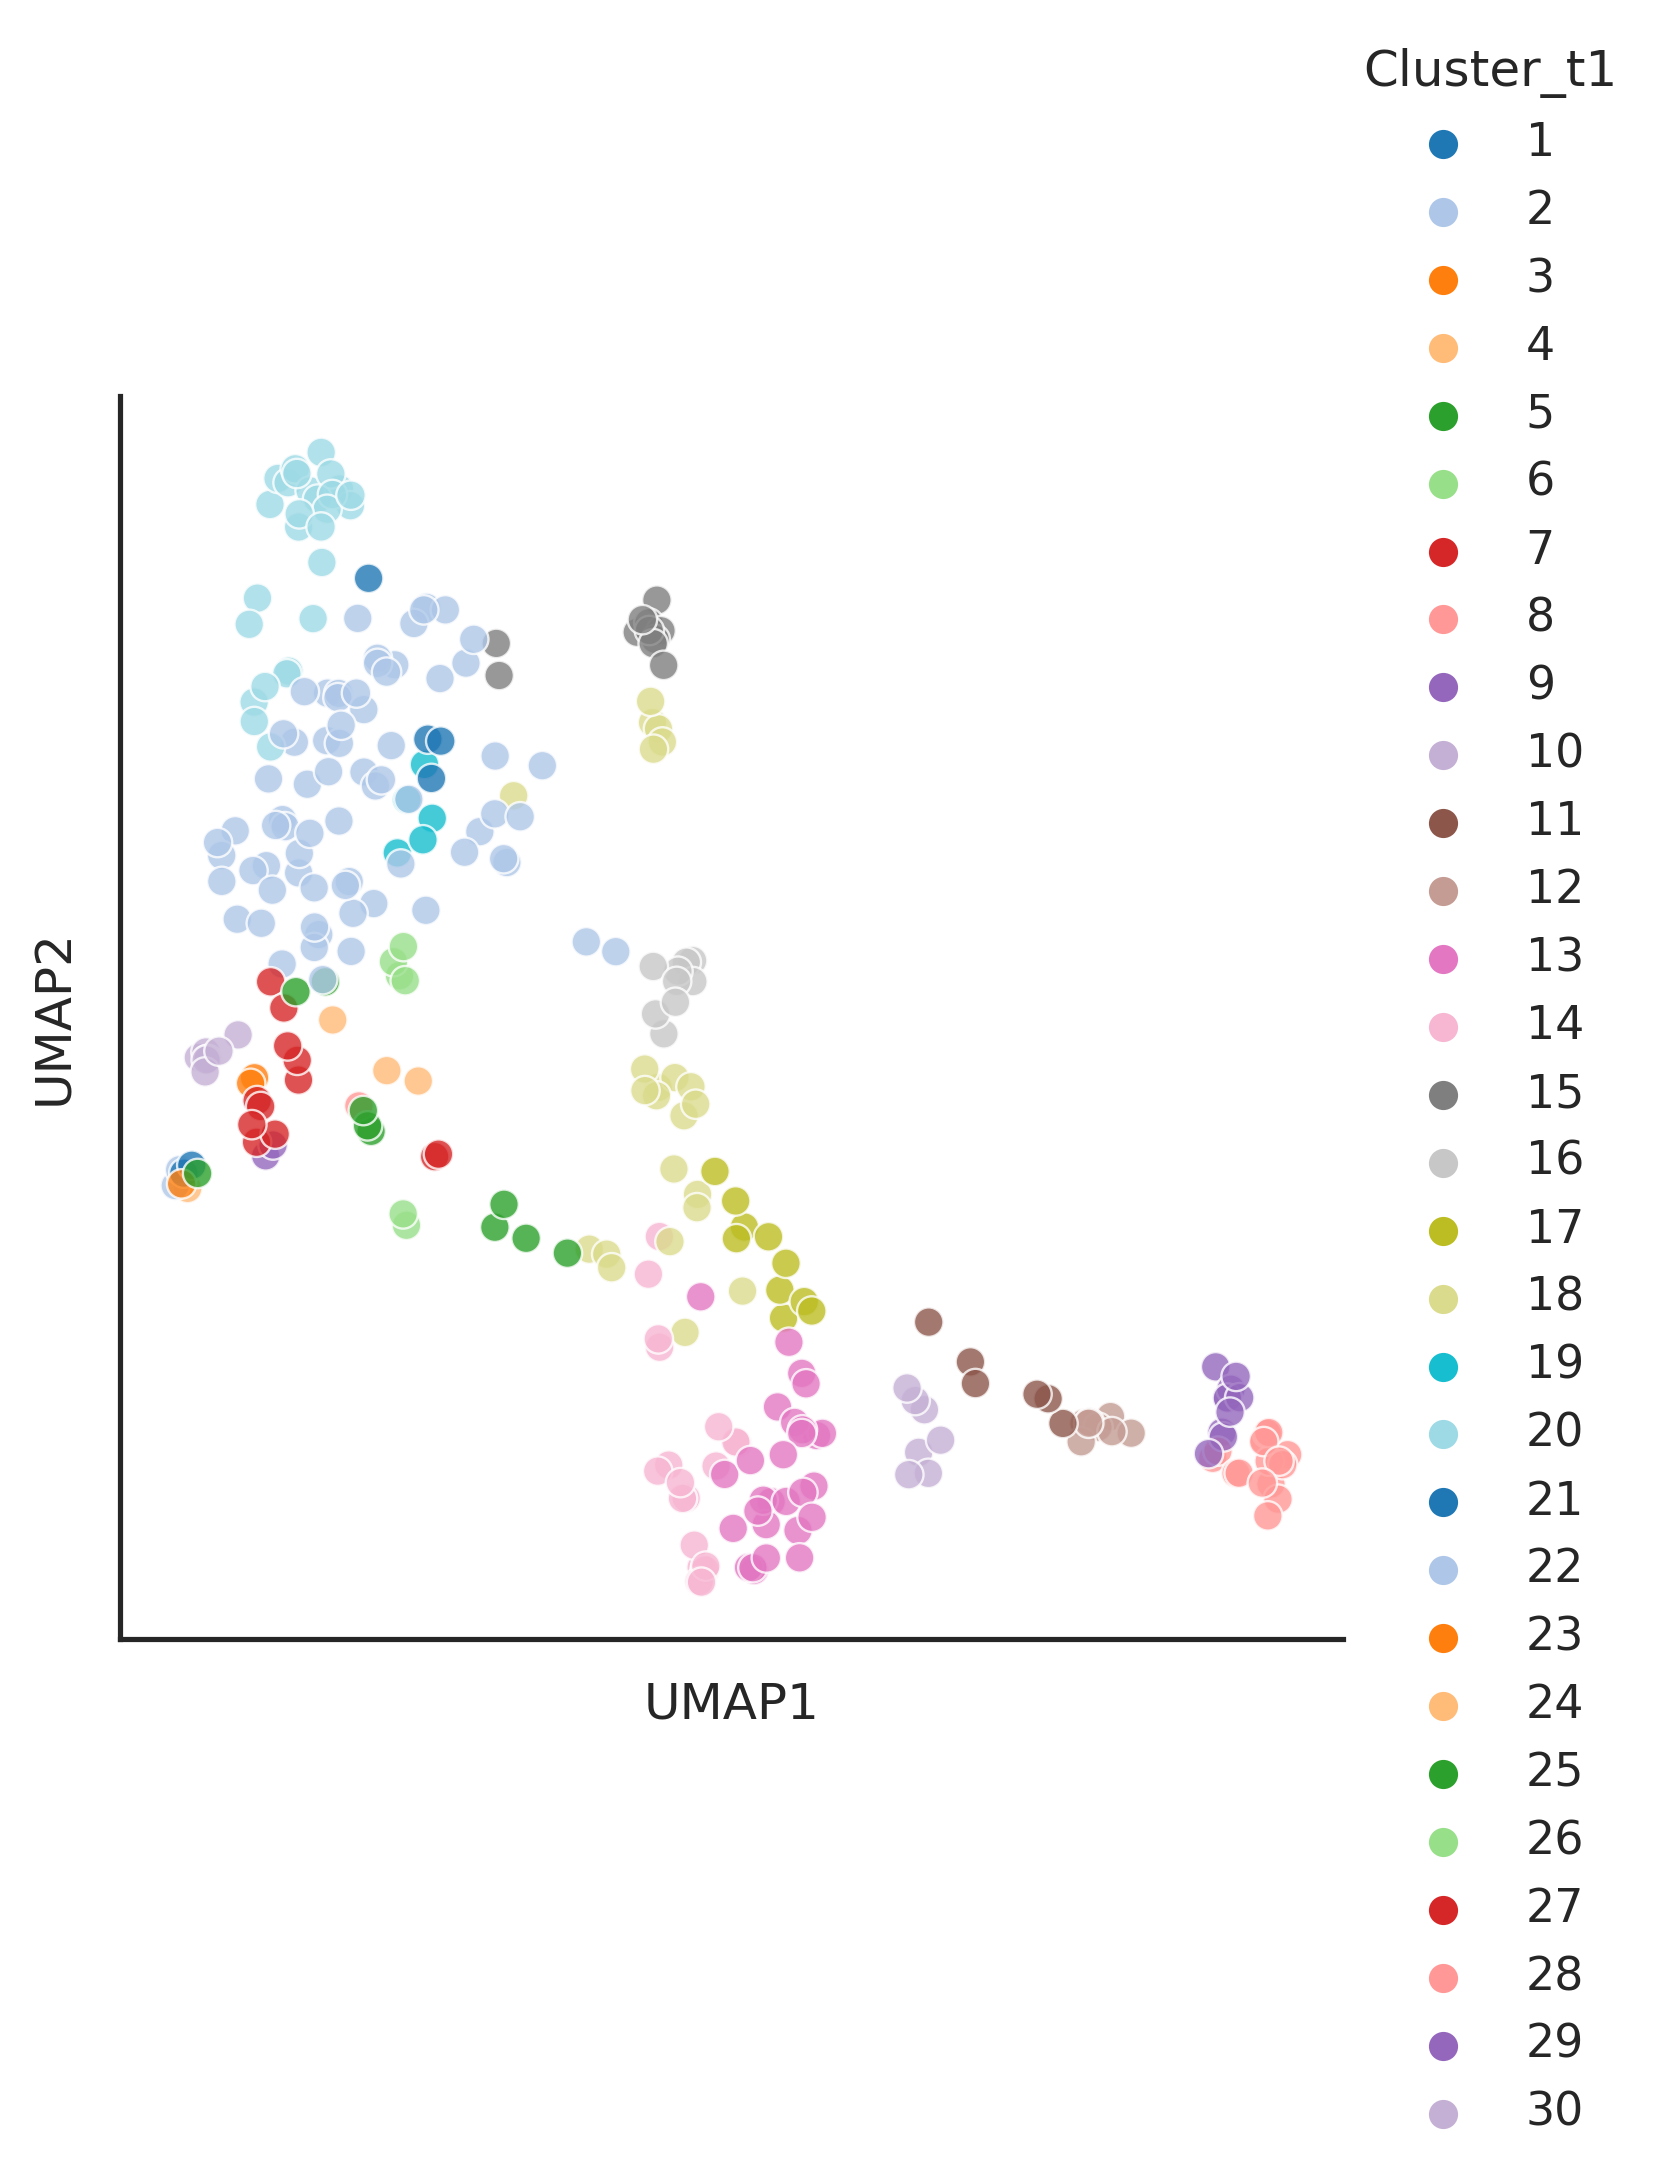

In [ ]:
plot_cluster(df, hue = info.Cluster_t1, legend=True,method= 'umap',complexity=30)

### t=2

13 clusters

In [ ]:
info.Cluster_t2.sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13], dtype=int32)

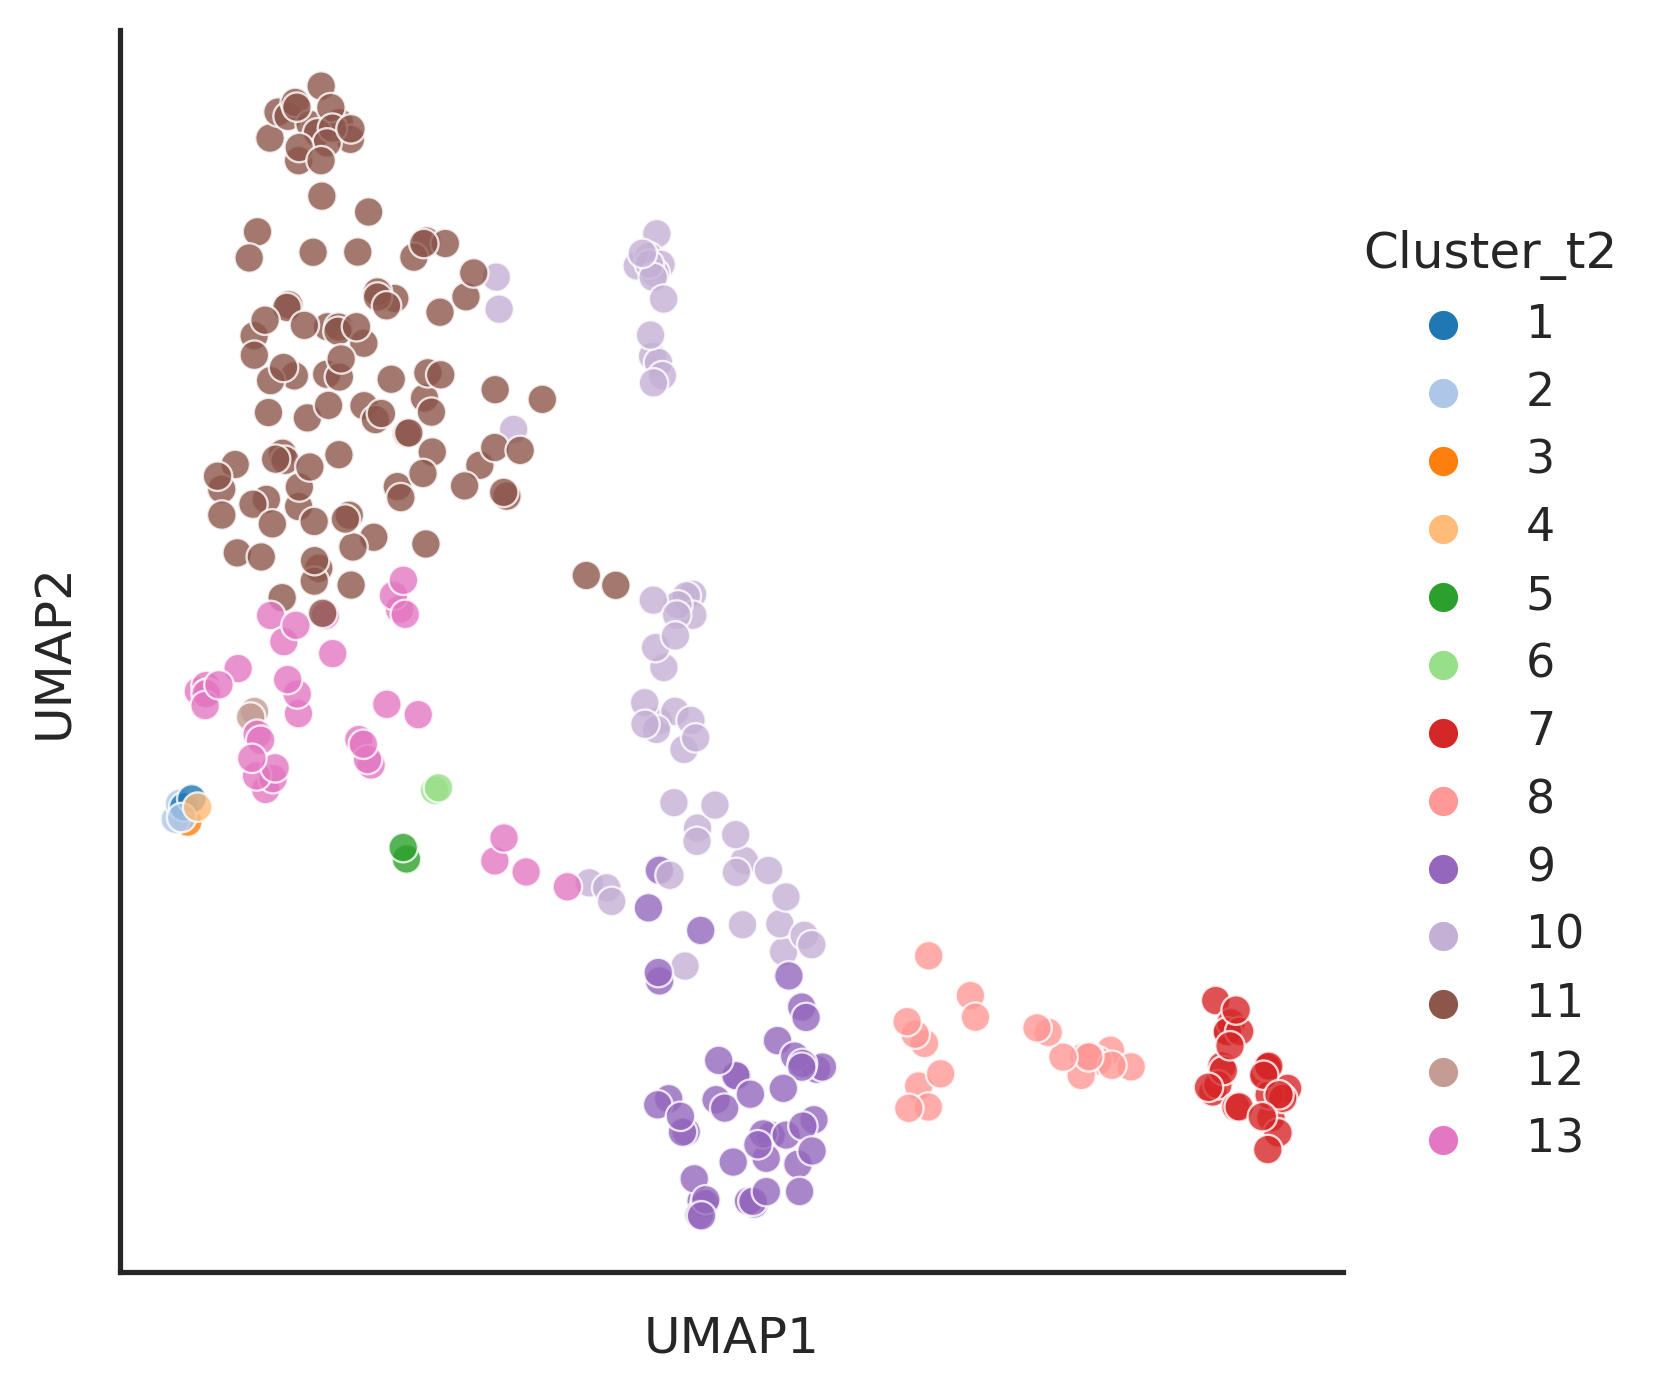

In [ ]:
plot_cluster(df, hue = info.Cluster_t2, legend=True,method= 'umap',complexity=30)